![](GMIT_Logo.jpg)

# Higher Diploma in Science in Computing (Data Analytics)
#### Programme Module: Programming for Data Analysis (COMP08050)
---
### Project 2020

![](Banner.png)

For this project we were tasked with producing a synthesised dataset through simulation. We were also asked to produce the data via the use of NumPy’s random package. The dataset produced had to simulate a real-world phenomenon of your choosing. I chose a dataset from the aviation industry which looked at flight delays across the United States. The dataset included information about the number, length and types of delays experienced at airports throughout the country for individual months. From this dataset I had to investigate the types of variables involved, their likely distributions and their relationships with each other and then synthesise/simulate a new dataset as closely matching their properties as possible. Let’s have a look at simulation and synthetic data first and discuss why they are so important.


What is simulation? Simulation is a tool to evaluate the performance of a system or process either existing or proposed. It is done under different configurations of interest and over long periods of real time. (Introduction to Modelling and Simulation). According to Wikipedia “*simulation is used in many contexts, such as simulation of technology for performance tuning or optimizing, safety engineering, testing, training, education, and video games. Often, computer experiments are used to study simulation models. Simulation is also used with scientific modelling of natural systems or human systems to gain insight into their functioning, as in economics. Simulation can be used to show the eventual real effects of alternative conditions and courses of action. Simulation is also used when the real system cannot be engaged, because it may not be accessible, or it may be dangerous or unacceptable to engage, or it is being designed but not yet built, or it may simply not exist*”. (Wikipedia, 2020).  Simulation can be used to answer questions such as what the best design for a new telecommunications network is or how will the behaviour of  a circuit or a device react when increased load is anticipated or how will and airport terminal operate with increasing passenger numbers.


In order to carry out simulation you require access to lots of data. If you don’t have access or the data doesn’t exist then you need to create it. The created data or synthetic data is artificial data that is created using different algorithms that mirror the statistical properties of the original data. In business synthetic data can be used in marketing to produce targeted individual level campaigns to reduce marketing spend and increase sales or in agile development and DevOps to test new software. Synthetic data is also used in the healthcare sector for clinical and scientific trials for producing a baseline for future studies and testing when no real data yet exists. (AI Multiple, 2020). Outlined below are just of the industries that benefit from synthetic data.


- __Automotive:__ Research to develop autonomous things such as robots, drones and self-driving car simulations pioneered the use of synthetic data.

- __Robotics:__ Real-life testing of robotic systems is expensive and slow. Synthetic data enables companies to test their robotics solutions in thousands of simulations, improving their robots and complementing expensive real-life testing.

- __Manufacturing:__ As Leo Tolstoy states at the beginning of Anna Karenina: “All happy families are alike; each unhappy family is unhappy in its own way.” It is hard to test a system to see whether it identifies anomalies since there are infinitely many anomalies. Synthetic data enables more effective testing of quality control systems, improving their performance.

- __Financial services:__ Fraud protection is a major part of any financial service and with synthetic data, new fraud detection methods can be tested and evaluated for their effectiveness.

- __Healthcare:__ Synthetic data enables healthcare data professionals to allow the public use of record data while still maintaining patient confidentiality.

- __Social Media:__ Facebook is using synthetic data to improve its various networking tools and to fight fake news, online harassment, and political propaganda from foreign governments by detecting bullying language on the platform.


The dataset I chose for this project is available from the CORGIS Dataset Project which was developed by Austin Bart to provide diverse real-world datasets for introductory computing. "*The CORGIS project (https://think.cs.vt.edu/corgis) enables instructors to easily incorporate data science into their classroom. Specifically, it provides over 40 datasets in areas including history, politics, medicine, and education. Additionally, the CORGIS infrastructure supports the integration of new datasets with simple libraries for Java, Python, and Racket, thus empowering introductory students to write programs that manipulate real data. Finally, the CORGIS web-based tools allow learners to visualize and explore datasets without programming, enabling data science lessons on day one.*"


The dataset as explained already looks at flight delays by airport across the United States. 


## 1.0 Import required libraries

In [1]:
# For importing and data manipulation.
import pandas as pd

# For simulating synthetic dataset.
import numpy as np

# Matplotlib forms basis for visualisation in Python.
import matplotlib.pyplot as plt

# Use the Seaborn library for visualisation.
import seaborn as sns

# Used to estmate probable distributions
from scipy import stats

# Graphics in retina format are more sharp and legible.
%config InlineBackend.figure_format = 'retina'

# Sets the backend of matplotlib to the 'inline' backend.
%matplotlib inline

## 2.0 Load the dataset from CORGIS

In [2]:
df = pd.read_csv(
    'https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv')

To get to know our data, let's look at the first 2 entries using head():

In [3]:
pd.set_option('display.max_columns', None)
df.head(2)

Airport.Code                                       Airport.Name Time.Label  \
0          ATL  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...    2003/06   
1          BOS                    Boston, MA: Logan International    2003/06   

   Time.Month Time.Month Name  Time.Year  Statistics.# of Delays.Carrier  \
0           6            June       2003                            1009   
1           6            June       2003                             374   

   Statistics.# of Delays.Late Aircraft  \
0                                  1275   
1                                   495   

   Statistics.# of Delays.National Aviation System  \
0                                             3217   
1                                              685   

   Statistics.# of Delays.Security  Statistics.# of Delays.Weather  \
0                               17                             328   
1                                3                              66   

                           Statistics.Carriers.Names  \
0  American Airlines Inc.,JetBlue Airways,Contine...   
1  American Airlines Inc.,Alaska Airlines Inc.,Co...   

   Statistics.Carriers.Total  Statistics.Flights.Cancelled  \
0                         11                           216   
1                         14                           138   

   Statistics.Flights.Delayed  Statistics.Flights.Diverted  \
0                        5843                           27   
1                        1623                            3   

   Statistics.Flights.On Time  Statistics.Flights.Total  \
0                       23974                     30060   
1                        7875                      9639   

   Statistics.Minutes Delayed.Carrier  \
0                               61606   
1                               20319   

   Statistics.Minutes Delayed.Late Aircraft  \
0                                     68335   
1                                     28189   

   Statistics.Minutes Delayed.National Aviation System  \
0                                             118831     
1                                              24400     

   Statistics.Minutes Delayed.Security  Statistics.Minutes Delayed.Total  \
0                                  518                            268764   
1                                   99                             77167   

   Statistics.Minutes Delayed.Weather  
0                               19474  
1                                4160

### 2.1 Rename columns and abbreviate

The column names are very long so let's rename and abbreviate some of the names.

<div class="alert alert-block alert-info"><b>Note: </b>  (Delayed : DLA), (Number : No), (National Aviation System : NAS), (Flights : Flt), (Minutes : Min). 
</div> 

In [4]:
df.rename(columns={"Airport.Code": "Airport Code", "Airport.Name": "Airport Name", "Time.Label": "Time Label",
                   "Time.Month": "Time Month", "Time.Month Name": "Time Month Name", "Time.Year": "Time Year",
                   "Statistics.# of Delays.Carrier": "No of DLA Carrier", 
                   "Statistics.# of Delays.Late Aircraft": "No of DLA Late Aircraft",
                   "Statistics.# of Delays.National Aviation System": "No of DLA NAS",
                   "Statistics.# of Delays.Security": "No of DLA Security",
                   "Statistics.# of Delays.Weather": "No of DLA Weather","Statistics.Carriers.Names": "Carriers Names", 
                   "Statistics.Carriers.Total": "Carriers Total", "Statistics.Flights.Cancelled": "Flt Cancelled",
                   "Statistics.Flights.Delayed": "Flt Delayed", "Statistics.Flights.Diverted": "Flt Diverted", 
                   "Statistics.Flights.On Time": "Flt On Time","Statistics.Flights.Total": "Flt Total", 
                   "Statistics.Minutes Delayed.Carrier": "Min DLA Carrier",
                   "Statistics.Minutes Delayed.Late Aircraft": "Min DLA Late Aircraft",
                   "Statistics.Minutes Delayed.National Aviation System": "Min DLA NAS",
                   "Statistics.Minutes Delayed.Security": "Min DLA Security", 
                   "Statistics.Minutes Delayed.Total": "Min DLA Total",
                   "Statistics.Minutes Delayed.Weather": "Min DLA Weather"}, inplace=True)

### 2.2 Feature engineering

I noticed that the column Airport.Name combined the airport name, city and state so I'm going to split these out.

In [5]:
# New data frame with split value columns
new = df["Airport Name"].str.split(",", n=1, expand=True)

# Making separate City column from new data frame
df["City"] = new[0]

# Making separate State column from new data frame
df["State"] = new[1]

In [6]:
# New data frame with split value columns
new = df["State"].str.split(":", n=1, expand=True)

# Making separate State column from new data frame
df["State"] = new[0]

# Making separate Airport column from new data frame
df["Airport"] = new[1]

I also reordered some of the columns to make them easier to interpret.

In [7]:
df = df[["Airport Code", "City", "State", "Airport", "Time Label", "Time Month",
          "Time Month Name", "Time Year", "No of DLA Carrier", "No of DLA Late Aircraft",
          "No of DLA NAS", "No of DLA Security", "No of DLA Weather", "Flt Cancelled",
          "Flt Delayed", "Flt Diverted", "Flt On Time", "Flt Total", "Min DLA Carrier",
          "Min DLA Late Aircraft", "Min DLA NAS", "Min DLA Security", "Min DLA Total",
          "Min DLA Weather"
          ]]

### 2.3 Reduce dataset size

The CORGIS 'Airline' dataset is rather large for this project so I decided to reduce it's size. The dataset covers all major airports in the US for the years 2003 to 2016 by month which is 4,080 records. The dataset only contains partial records for 2003 and 2016 so I'm going to drop these from the dataset. I also decided to focus on the 5 biggest airports for the years 2004 to 2015 which would provide me with a more manageable dataset for simulation. The 5 biggest airports in the US as at 2020 are listed below.

<div class="alert alert-block alert-info"><b>1. Hartsfield–Jackson Atlanta International Airport (ATL) - 103.9 Million Passengers </b>  The chief reason why ATL is the busiest airport in the US is its favorable geographic location which makes it perfect as a connection hub. It deserves 150 domestic and 70 international destinations.
Not only that, it’s also a hub for one of the largest airlines in North America: Delta Airlines passengers account for a high proportion of passenger traffic in Atlanta Airport.
You might expect chaos to reign there, considering the sheer amount of people striding across the halls, especially since it isn’t one of the largest airports in the US. And yet, you’d be wrong to assume that: on the contrary, Hartsfield–Jackson has been elected the most efficient airport in the world… 19 years in a row! (The ClaimCompass Blog, 2020, (15))
</div> 

<div class="alert alert-block alert-info"><b>2. Los Angeles International Airport (LAX) - 84.5 Million Passengers </b>  LAX is the international airport acting as the gateway to Los Angeles, California. Its new terminal is dedicated to travellers from Asia and the Pacific.Second biggest airport by passenger traffic, it’s also one of the largest airports of the US West Coast, alongside San Francisco International Airport. Adding to the prestige of LAX is the fact that it is the only US airport designated as a hub by four US legacy airlines (Alaska, American, Delta, and United). (The ClaimCompass Blog, 2020, (15))
</div> 

<div class="alert alert-block alert-info"><b>3. O’Hare International Airport (ORD) - 79.8 Million Passengers</b> Chicago O’Hare held the #1 spot of busiest US airports by number of passengers from 1963 to 1998. It was the first major airport planned during the post-WWII era.Chicago’s international airport serves close to 230 destinations spread over all continents and acts as a hub for both American Airlines and United Airlines. Passenger traffic registered in ORD has kept rising since the early 2010s. (The ClaimCompass Blog, 2020, (15))
</div> 

<div class="alert alert-block alert-info"><b>4. Dallas/Fort Worth International Airport (DFW) - 75 Million Passengers</b> American Airlines’ largest hub is a monster that accommodated about 75 million air passengers in 2019 but also ranks #2 of the largest US airports.Get that: Dallas Airport is so big that it has its own ZIP code (75261) and postal service designation.
Texas’ busiest airport serves 260 destinations: 193 domestic airports and 67 destinations abroad. DFW is largely recognized as a technological pioneer among US airports, with a team dedicated to bringing new passenger-friendly innovations to the airport facilities. (The ClaimCompass Blog, 2020, (15))
</div> 

<div class="alert alert-block alert-info"><b>5. Denver International Airport (DEN) - 61 Million Passengers</b> Another giant, Denver Airport is perhaps more famous for being the largest US airport (see ranking below) and for having the longest public use runway in North America. Runway 16R/34L is also the seventh longest in the world, boasting 16,000 feet (4.88 km).
Den serves 215 destinations, including 189 US destinations, making it the airport with the second-largest domestic network. (The ClaimCompass Blog, 2020, (15))
</div> 

This section of extracts the data for the 5 airports described above for the years 2004 to 2015 and resets the index.

In [8]:
# Create new dataset with only records for the top 5 Airports
df = df[df['Time Year'].isin(
    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])]

# Reset the index
df.reset_index(drop=True);

In [9]:
# Create new dataset with only records for the top 5 Airports
df = df[df['Airport Code'].isin(['ATL', 'LAX', 'ORD', 'DFW', 'DEN'])]

# Reset the index
df.reset_index(drop=True);

Finally, below is a table outlining a description of each of the variables in the dataset.

### 2.4 Feature description

|__Key__     |__Datatype__ | __Comment__ |__Example Value__|
|:---------------------------------|:----------|:----------------------------------------------------------|--:|
|	Airport Code	|	String	|	The 3 letter code for this airport, assigned by IATA. For more information, consult this List of Airport Codes.	|	"ATL"	|
|	City	|	String	|	City in which the airport is located.	| Atlanta	|
| State | String | State in which the airport is located. | Georgia |
| Airport| String | Airport name | Logan International
|	Time Label	|	String	|	The "year/month" reported as a string, to make it easier to sort by time periods.	|	"2003/06"	|
|	Time Month	|	Integer	|	The reported month as a number. 0 is January, 1 is February, etc.	|	6	|
|	Time Month Name	|	String	|	MISSING_FIELD	|	"June"	|
|	Time Year	|	Integer	|	The reported year as a 4-digit number.	|	2003	|
|	No of DLA Carrier	|	Integer	|	The number of delays and cancellations due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.) in this month.	|	1009	|
|	No of DLA Late Aircraft	|	Integer	|	The number of delays and cancellations caused by a previous flight with the same aircraft arriving late, causing the present flight to depart late in this month.	|	1275	|
|	No of DLA NAS	|	Integer	|	The number of delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control in this month.	|	3217	|
|	No of DLA Security	|	Integer	|	Number of delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas in this month.	|	17	|
|	No of DLA Weather	|	Integer	|	Number of delays or cancellations caused by significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane in this month.	|	328	|
|	Flt Cancelled	|	Integer	|	The number of flights that were cancelled in this month.	|	216	|
|	Flt Delayed	|	Integer	|	The number of flights that were delayed in this month.	|	5843	|
|	Flt Diverted	|	Integer	|	The number of flights that were diverted in this month.	|	27	|
|	Flt On Time	|	Integer	|	The number of flights that were on time in this month.	|	23974	|
|	Flt Total	|	Integer	|	The total number of flights in this month.	|	30060	|
|	Min DLA Carrier	|	Integer	|	The number of minutes delayed due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.) in this month.	|	61606	|
|	Min DLA Late Aircraft	|	Integer	|	The number of minutes delayed caused by a previous flight with the same aircraft arriving late, causing the present flight to depart late in this month.	|	68335	|
|	Min DLA NAS	|	Integer	|	The number of minutes delayed attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control in this month.	|	118831	|
|	Min DLA Security	|	Integer	|	Number of minutes delayed caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas in this month.	|	518	|
|	Min DLA Total	|	Integer	|	$MISSING_FIELD	|	268764	|
|	Min DLA Weather	|	Integer	|	Number of of minutes delayed caused by significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane in this month.	|	19474	|

## 3.0 Exploratory Data Analysis

### 3.1 Dataframe lists

I will only be working with only some of the variables so lets filter and store their names in lists and redefine the DataFrame to contain only these variables:

In [157]:
delay_numeric = ['No of DLA Carrier', 'No of DLA Late Aircraft',
                 'No of DLA NAS', 'No of DLA Security', 'No of DLA Weather', 'Flt Cancelled', 'Flt Delayed',
                 'Flt Diverted', 'Flt On Time', 'Flt Total']

categorical = ['Airport Code', 'City', 'State', 'Airport']

time = ['Time Label', 'Time Year', 'Time Month', 'Time Month Name']

df = df[categorical + time + delay_numeric]
df.shape

(720, 18)

### 3.2 Number of flights by year (The Impact of Capacity)

Before delving into the dataset I want to get a general sense of the number of flights being recorded in the dataset by year.

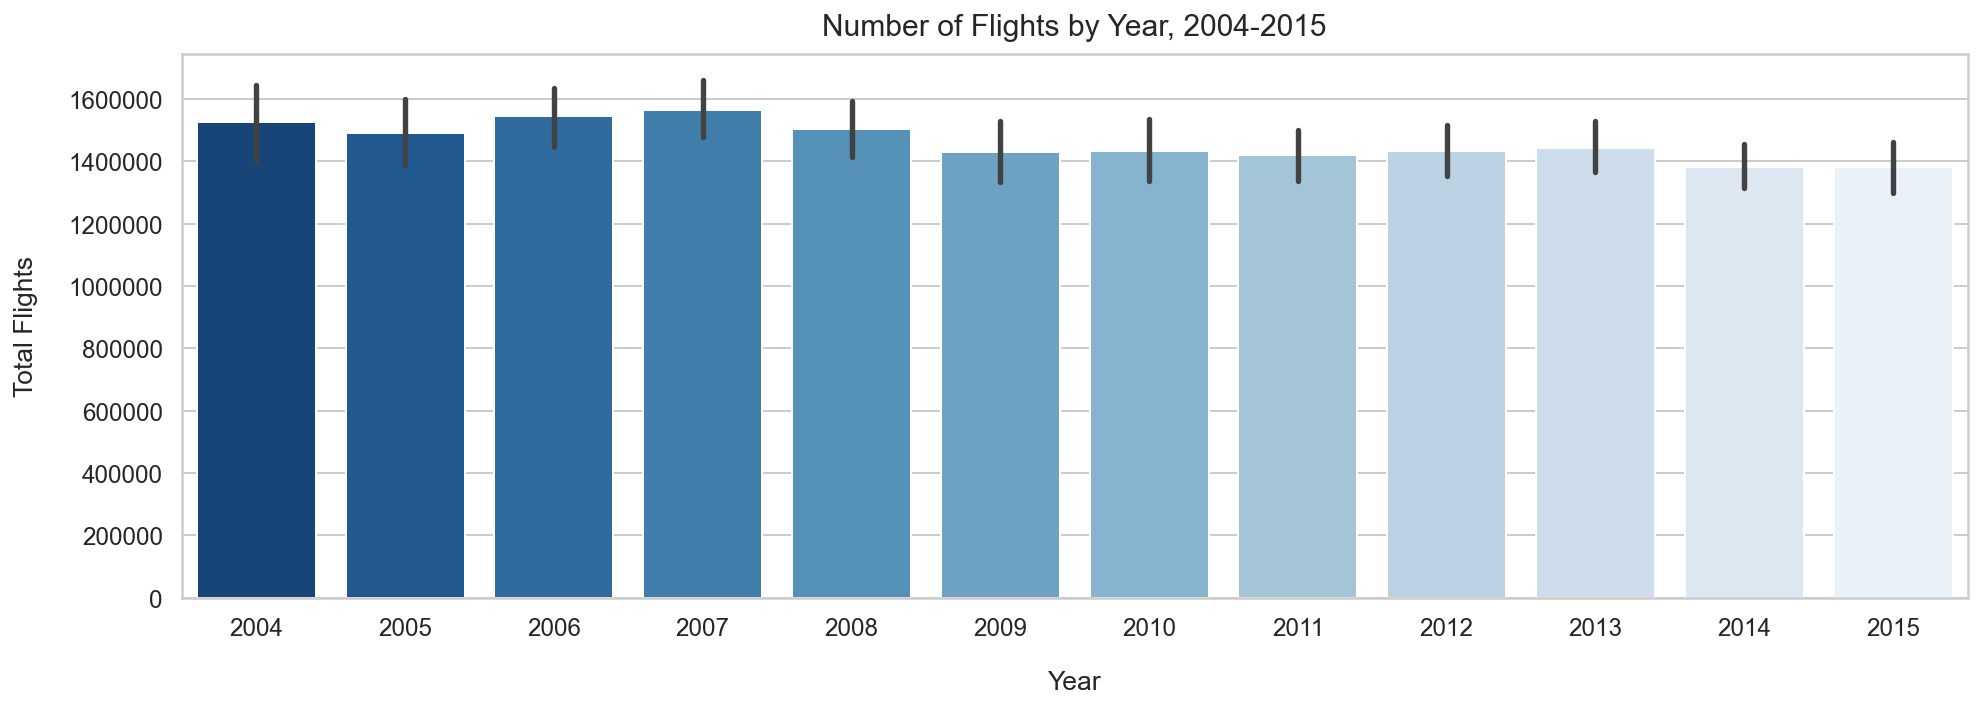

In [158]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [16, 5]})
sns.barplot(data=df, x='Time Year', y='Flt Total',
            palette="Blues_r", estimator=sum)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Flights", labelpad=15)
plt.title("Number of Flights by Year, 2004-2015", fontsize=15, y=1.012)
plt.ticklabel_format(style='plain', axis='y', useOffset=False);

I was surprised by the plot as it seems pretty uniform considering the volume of flights taking place. Between the five airports approximately 1.5 million flights on average are being handled each year. However, considering the nature of aviation and airports in particular, the fact that there is relatively little change on a yearly basis is hardly surprising as there is a constant airport capacity issue that has to be dealt with. 

According to Lynnette Dray "*Demand for air travel is projected to continue growing at an average rate of 4–5% per year. However, capacity for growth at the world's major airports is limited*". Factors that limit airport capacity and thus increasing the number of flights and passengers that can be handled include:

1. Air traffic control separation standards
2. Aircraft characteristics 
3. Runway configuration
4. Movement mix
5. Air traffic control operational strategies
6. Other factors which influence runway capacity, e.g. safety, weather, noise, etc, can be shown to act through one or more of these five factors.

De Neufville explains the relationship of capacity, demand, and delay thus: "*The  performance  of  a  service  system  is,  indeed, sensitive to the pattern of loads especially when they  approach  its  capacity.  The  capacity  of  a  service facility is, thus, not at all similar to our notion of capacity in everyday life, that is, the volume that a bottle or other vessel can hold. A bottle  will  accommodate  any  amount  of  liquid  up to its capacity equally well; and after that, it can hold no more. A service facility, on the other hand, does not provide equal service at all times;its  service  rapidly  deteriorates  as  traffic  nears capacity. A service facility, can, furthermore,eventually handle more than its immediate capacity  by  delaying  traffic  until  an  opportunity  for service exists*".

<div class="alert alert-block alert-info"><b>Airport Capacity:</b>  There are two commonly used definitions of airfield  capacity: “through put” and “practical capacity”. The throughput definition of capacity is the rate at which aircraft can be handled i.e.,brought  into  or  out  of  the  airfield,  without  regard to  any  delay  they  might  incur.  This  definition assumes  that  aircraft  will  always  be  present  waiting to take off or land, and capacity is measured in terms of the number of such operations that can be accomplished in a given period of time.Practical  capacity  is  the  number  of  operations(takeoffs and landings) that can be accommodated with  no  more  than  a  given  amount  of  delay,usually  expressed  in  terms  of  maximum  accept-able  average  delay.  Practical  Hourly  Capacity(PHOCAP) and Practical Annual Capacity (PAN-CAP)  are  two  commonly  used  measures  based  on this definition.PANCAP, for example, is defined as that level of operations which results in not more than 4 minutes average delay per aircraft in the normal peak 2-hour operating period.
</div> 

### 3.3 Number of flights by month (Seasonality)

I'm also interested in the number of flights across each month for the selected years.

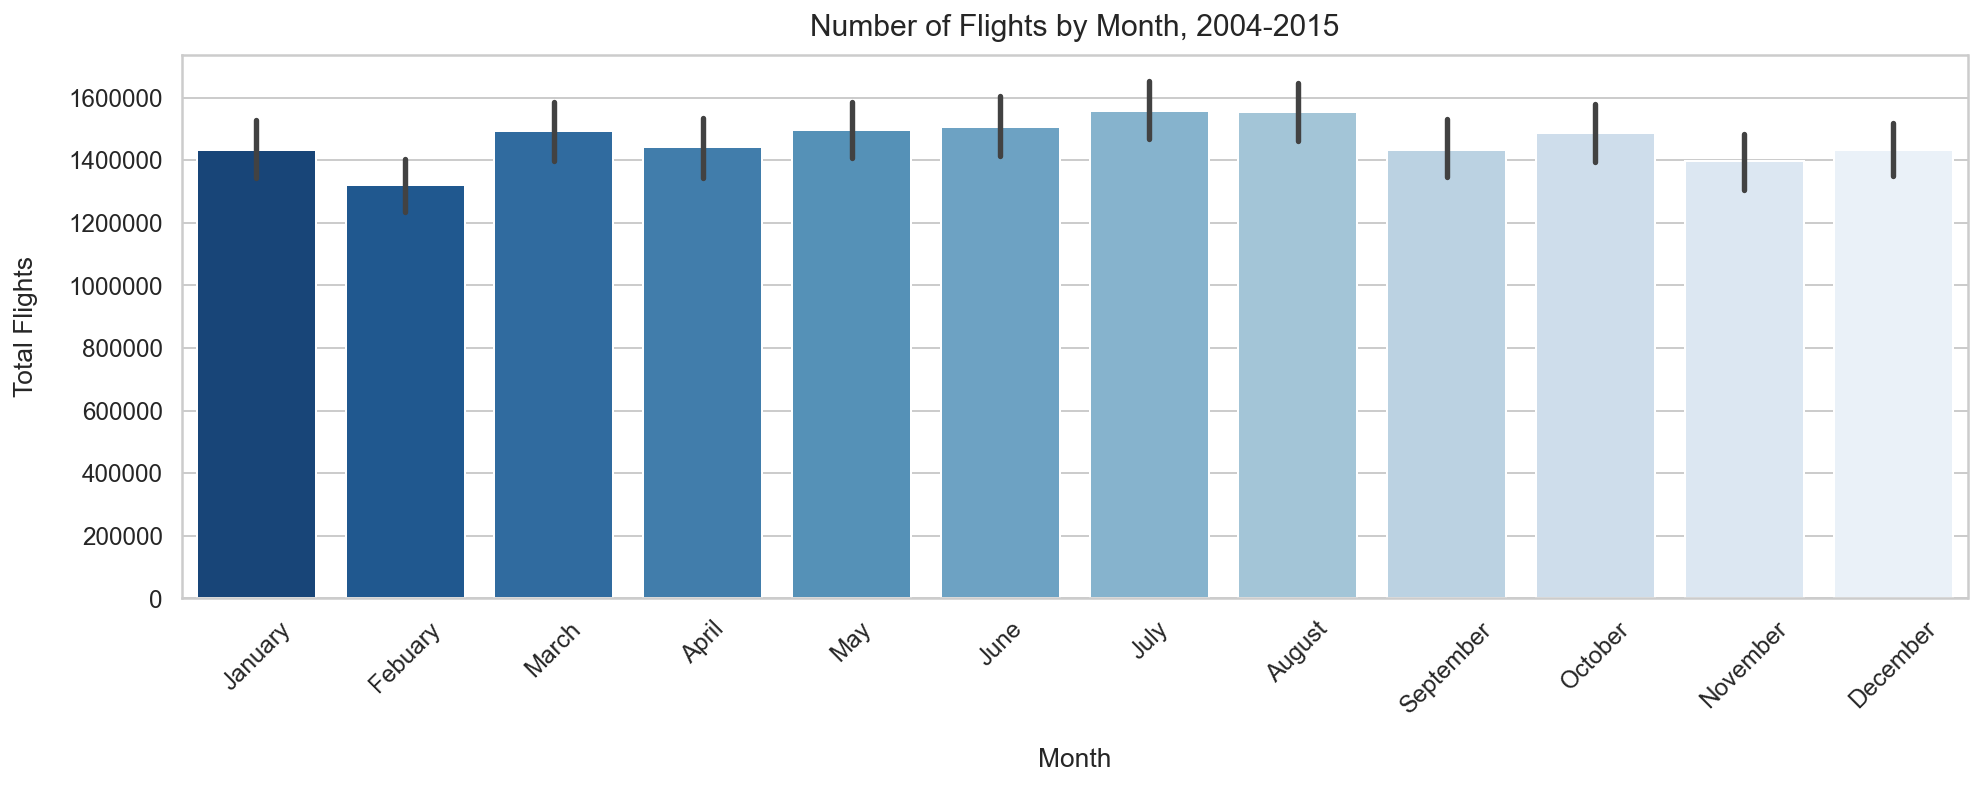

In [159]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [16, 5]})
sns.barplot(data=df, x='Time Month Name', y='Flt Total',
            palette="Blues_r", estimator=sum)
plt.xlabel("Month", labelpad=15)
plt.ylabel("Total Flights", labelpad=15)
plt.title("Number of Flights by Month, 2004-2015", fontsize=15, y=1.012)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.xticks(rotation=45);

As expected the summer months appear to be the busiest. However, when analysing flights, days rather than months provide more interesting information. In the US the below days are the busiest in the year. Unfortunately this dataset is aggregated to a monthly level. Analysis has shown however that the blow dates are the busiest:
1. The Day Before Thanksgiving
2. Fridays in Summer
3. Christmas
4. July 4th
5. Memorial Day
6. Spring Break
7. New Year's Eve
8. Labour Day
9. Easter
10. Mardi Gras

### 3.4 Relationship between flights and delays

Now lets look at the relationship between the total number of delays and the total number of flights for the 5 airports I have chosen. 

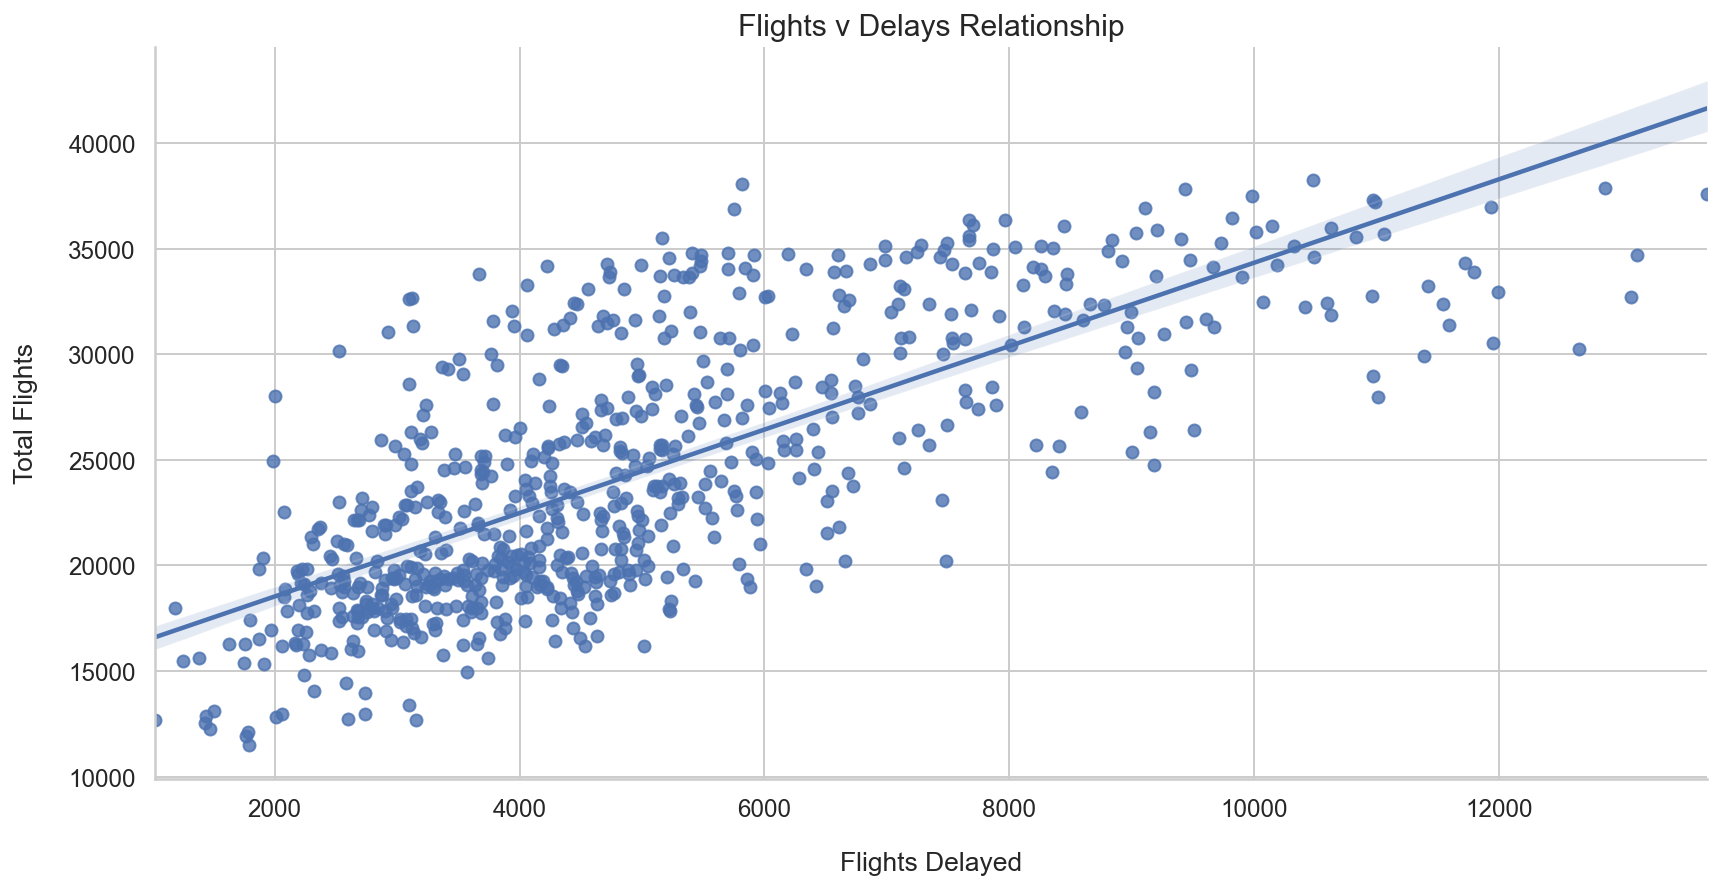

In [13]:
sns.lmplot(x="Flt Delayed", y="Flt Total", data=df,
           height=6, aspect=2, palette="Set1")
plt.xlabel("Flights Delayed", labelpad=15)
plt.ylabel("Total Flights", labelpad=15)
plt.title("Flights v Delays Relationship", fontsize=15, y=1.012);

It's evident that their is a strong relationship between flight delays and total flights as one is determined by the other. Let's have a look at how each of the five airports compare.

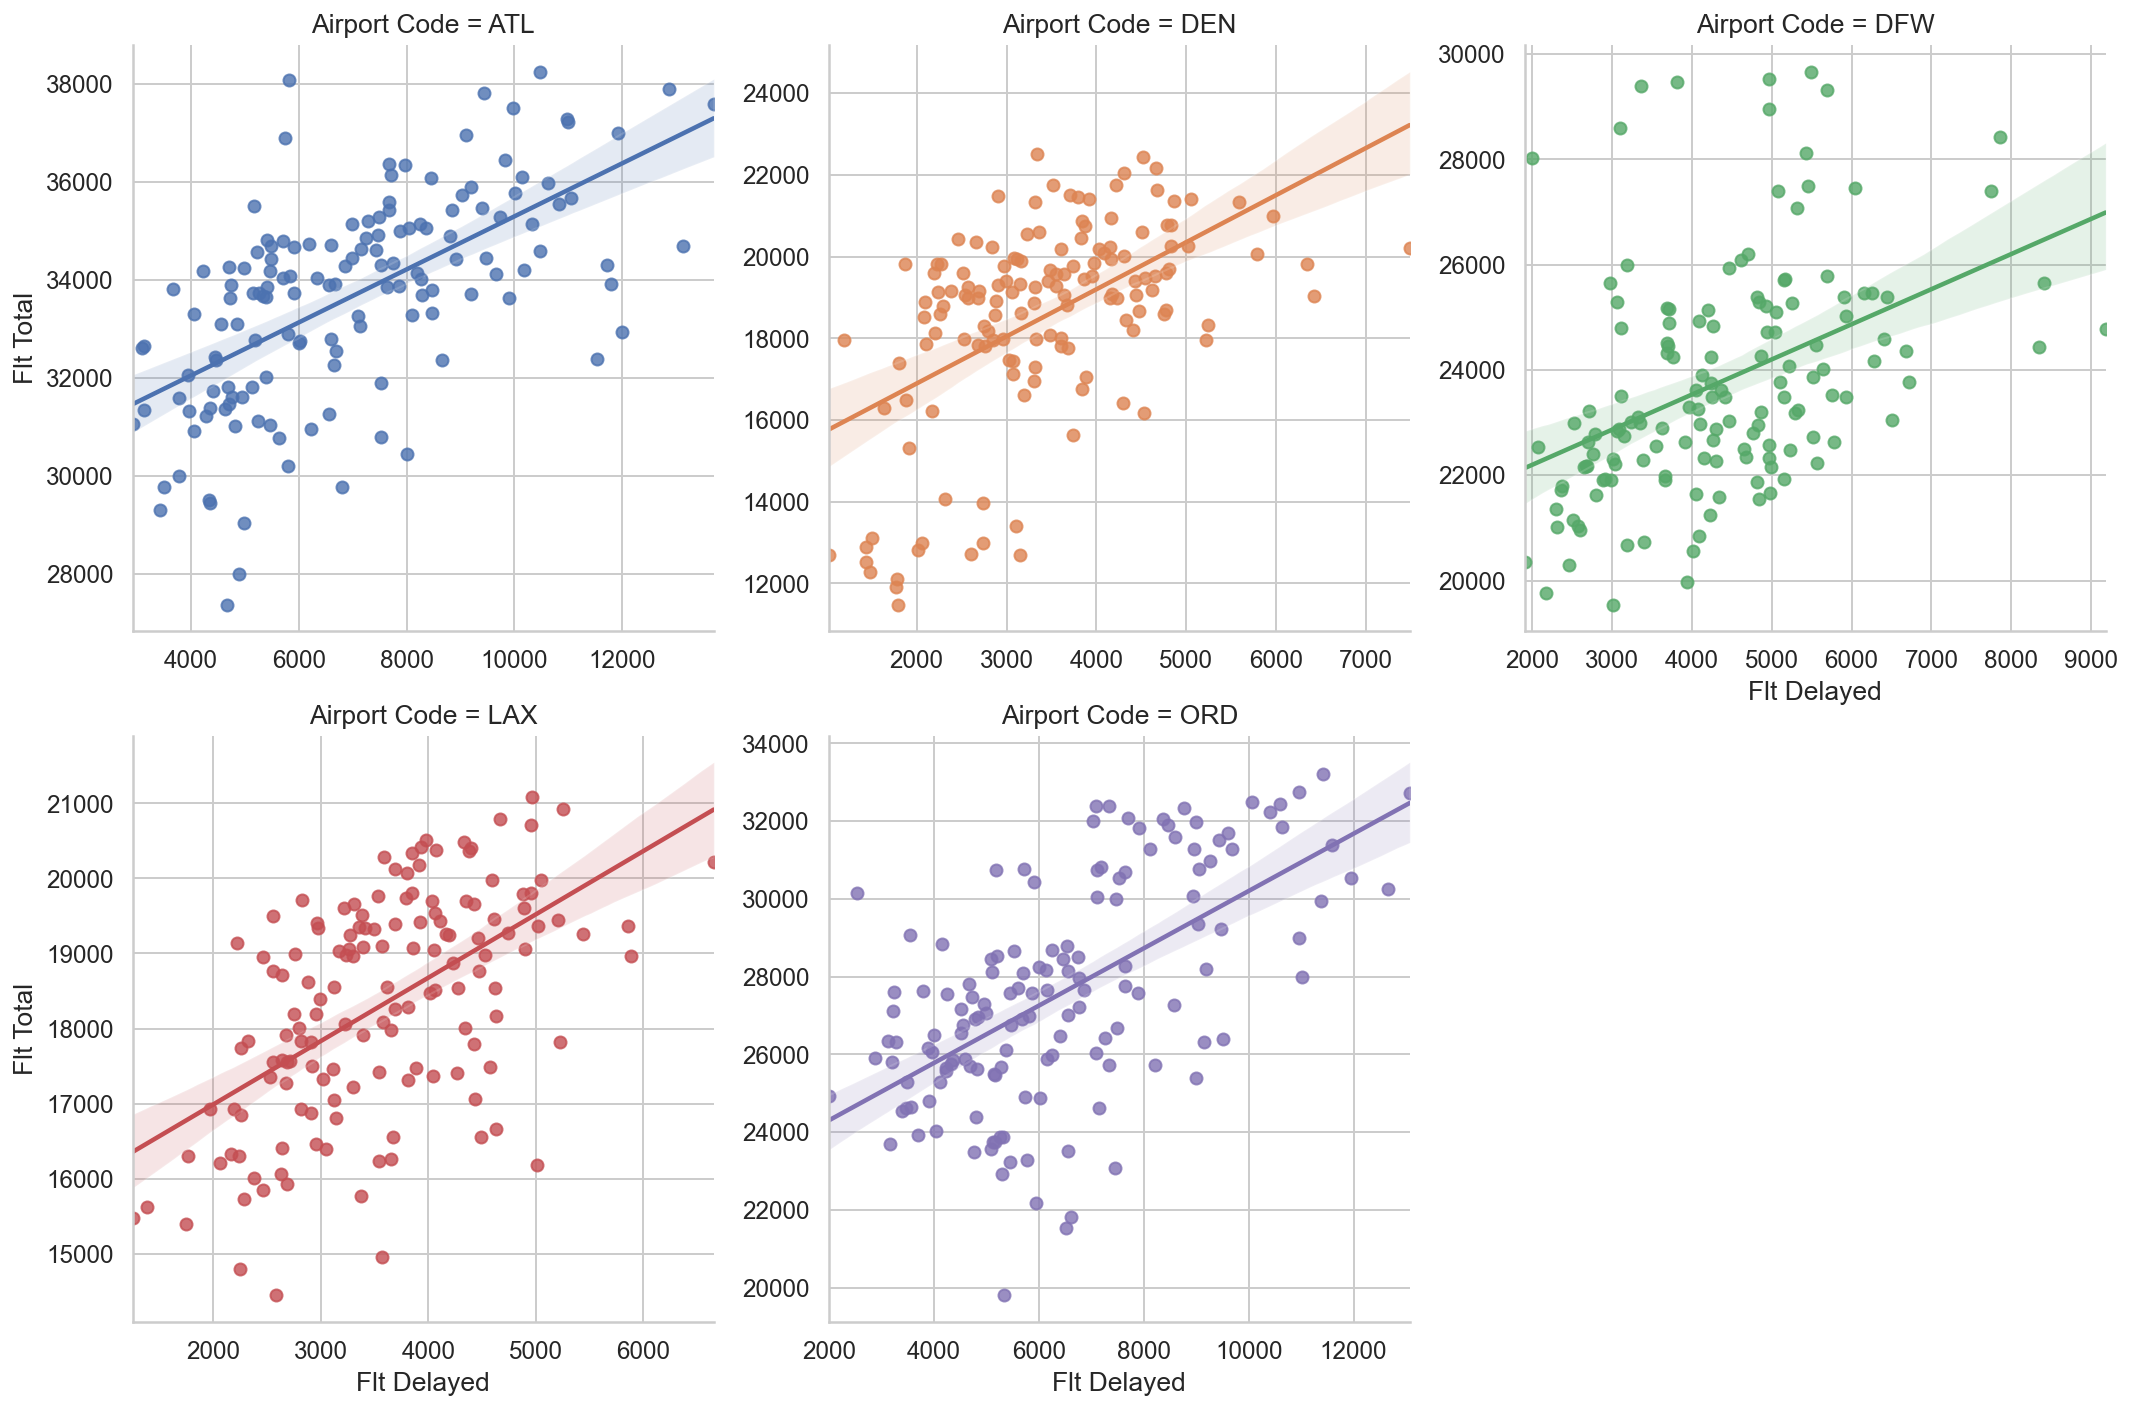

In [14]:
sns.lmplot(x="Flt Delayed", y="Flt Total", col="Airport Code", hue="Airport Code",

           data=df, col_wrap=3, height=5, sharex=False, sharey=False);

As at the total level there is also a positive correlation at the individual airport level.

## 4.0 Flight delay reasons

This section covers the reasons for delayed flights covering the period 2004 to 2015. The US Bureau of Transportation Statistics has defined five categories of flight delays. They are 1. Air Carrier, 2. Extreme Weather, 3. National Aviation System (NAS), Late Arrival Aircraft and 5. Security. For each of these categories I have provided a brief description, some statistical details through the use of the Pandas describe method and a distribution and density implemented through Seaborn. I have also applied a potential distribution using SciPy. 

I have also analysed the data for each delay category through the combination of a boxplot and swarmplot, to interpret the data and finally I looked at the relationship of each category to total flights across the five chosen airports to see if there is a positive or negative correlation. This analysis will facilitate simulating a synthetic dataset as closely matching their properties as possible. 

### 4.1 Carrier flight delays

<div class="alert alert-block alert-info"><b>Air Carrier:</b> The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.)(Bureau of Transportation Statistics).
</div> 

In [15]:
df['No of DLA Carrier'].describe()

count     720.000000
mean     1097.250000
std       384.737125
min       411.000000
25%       824.000000
50%      1045.500000
75%      1277.250000
max      3087.000000
Name: No of DLA Carrier, dtype: float64

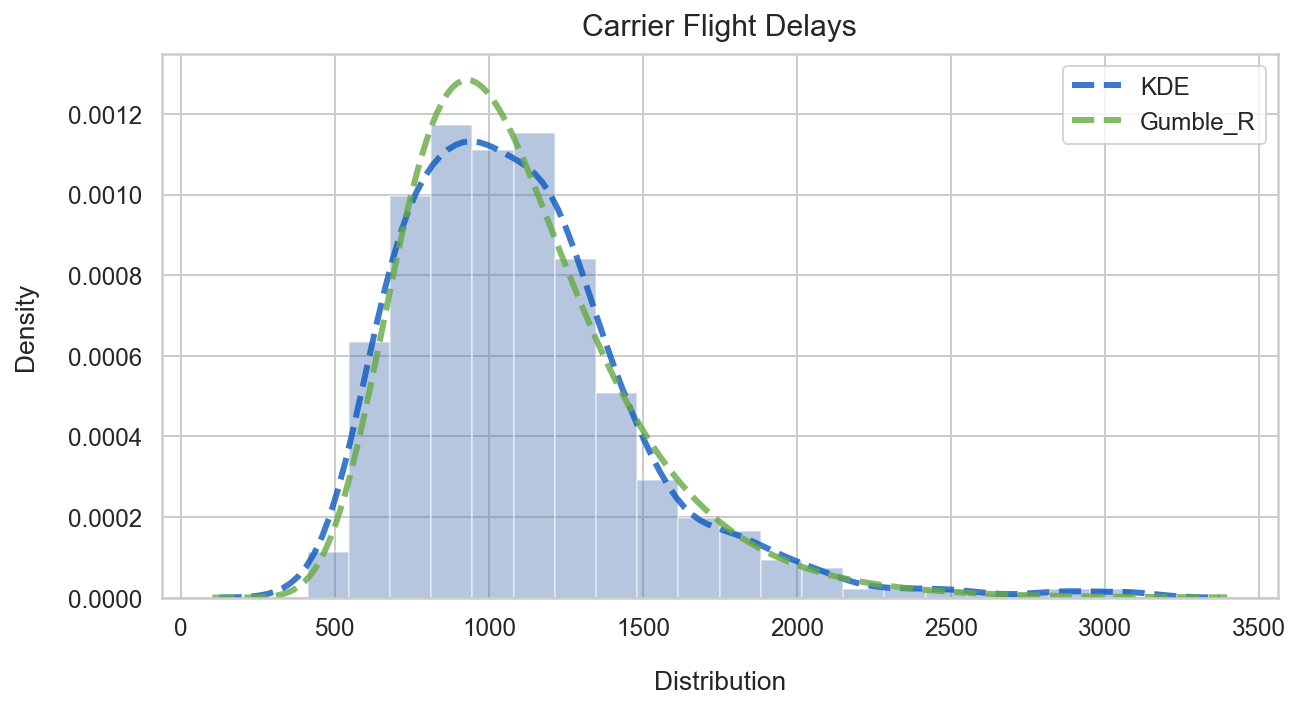

In [16]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(df['No of DLA Carrier'], kde=True, bins=20, hist=True, fit=stats.gumbel_r, 
fit_kws={'color': '#66aa44','linewidth': 3, 'linestyle': '--', 'alpha': 0.8,"label": "Gumble_R"}, 
kde_kws={"label": "KDE",'color': '#0b59c2','linewidth': 3, 'linestyle': '--', 'alpha': 0.8})
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15)
plt.title("Carrier Flight Delays", fontsize=15, y=1.012)
plt.legend();

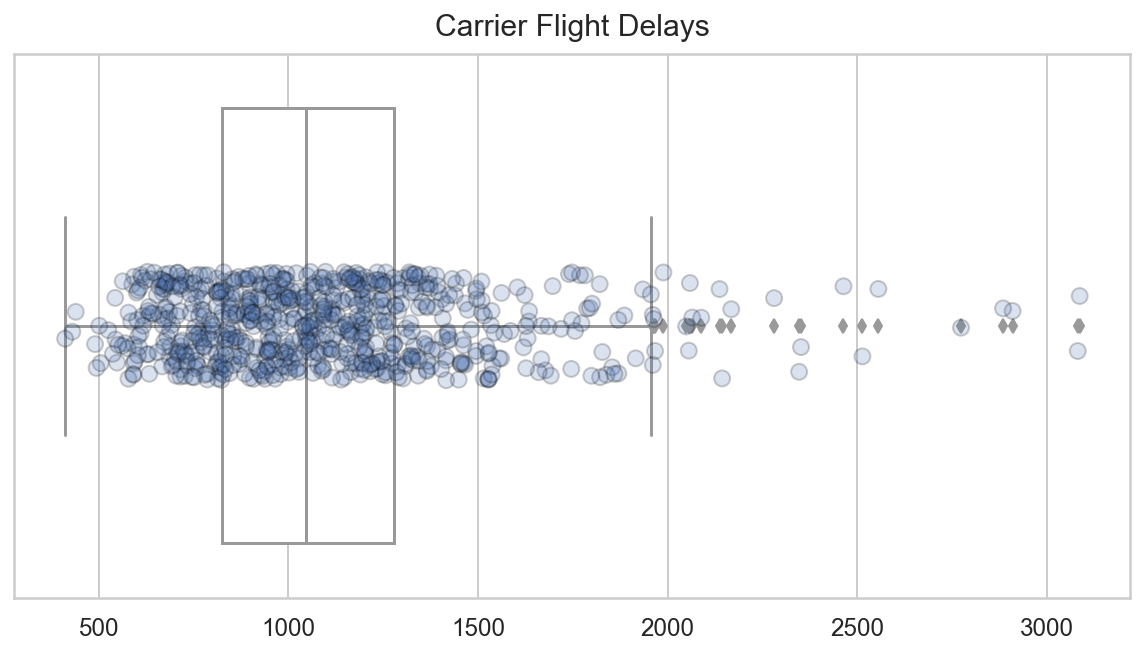

In [17]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.boxplot(df['No of DLA Carrier'], color="white")
sns.stripplot(df['No of DLA Carrier'], edgecolor="black",
              alpha=.2, s=8, linewidth=1.0)
plt.xlabel('')
plt.title("Carrier Flight Delays", fontsize=15, y=1.012);

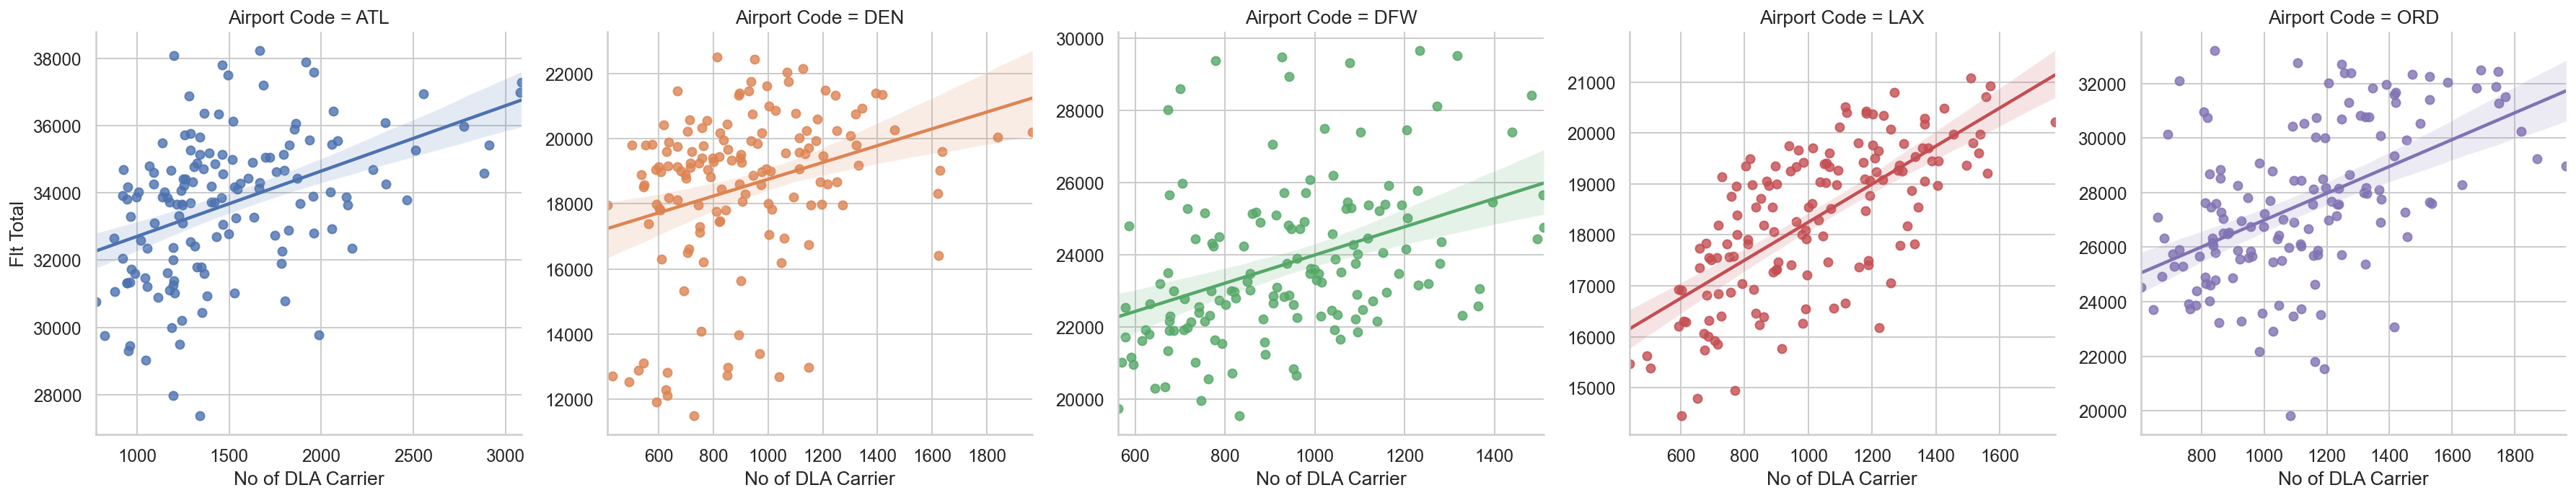

In [18]:
sns.lmplot(x="No of DLA Carrier", y="Flt Total", col="Airport Code", hue="Airport Code",
           data=df, col_wrap=5, height=5, aspect=1.0, sharex=False, sharey=False);

### 4.2 Late Aircraft delays

<div class="alert alert-block alert-info"><b>Late Aircraft:</b> A previous flight with same aircraft arrived late, causing the present flight to depart late.
</div> 

In [19]:
df['No of DLA Late Aircraft'].describe()

count     720.000000
mean     1699.452778
std       696.912751
min       261.000000
25%      1199.250000
50%      1579.000000
75%      2095.500000
max      4483.000000
Name: No of DLA Late Aircraft, dtype: float64

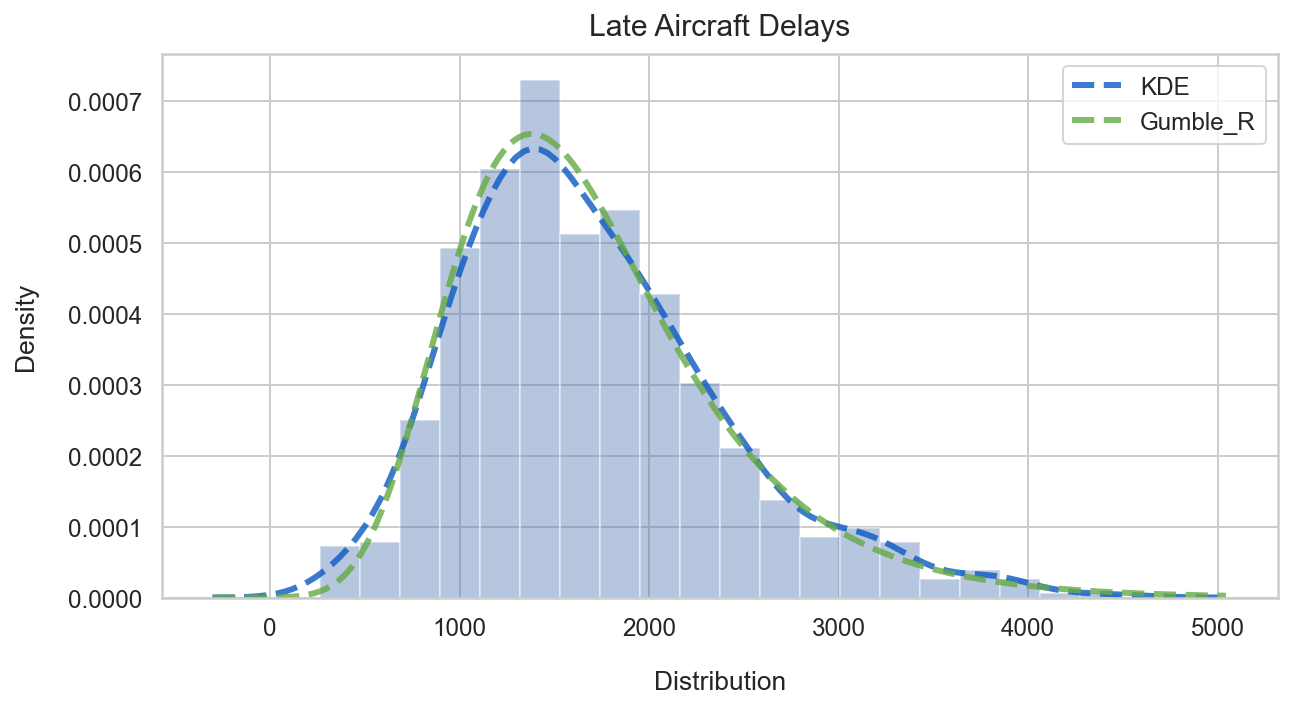

In [20]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(df['No of DLA Late Aircraft'], kde=True, bins=20, hist=True, fit=stats.gumbel_r, 
fit_kws={'color': '#66aa44','linewidth': 3, 'linestyle': '--', 'alpha': 0.8,"label": "Gumble_R"}, 
kde_kws={"label": "KDE",'color': '#0b59c2','linewidth': 3, 'linestyle': '--', 'alpha': 0.8})
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15)
plt.title("Late Aircraft Delays", fontsize=15, y=1.012)
plt.legend();

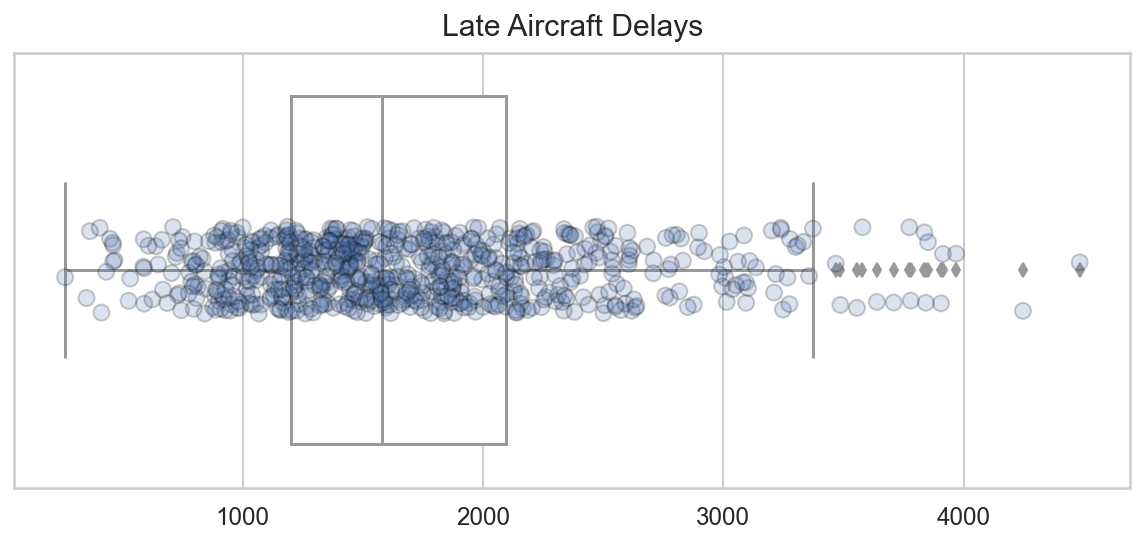

In [21]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 4]})
sns.boxplot(df['No of DLA Late Aircraft'], color="white")
sns.stripplot(df['No of DLA Late Aircraft'], edgecolor="black",
              alpha=.2, s=8, linewidth=1.0)
plt.xlabel('')
plt.title("Late Aircraft Delays", fontsize=15, y=1.012);

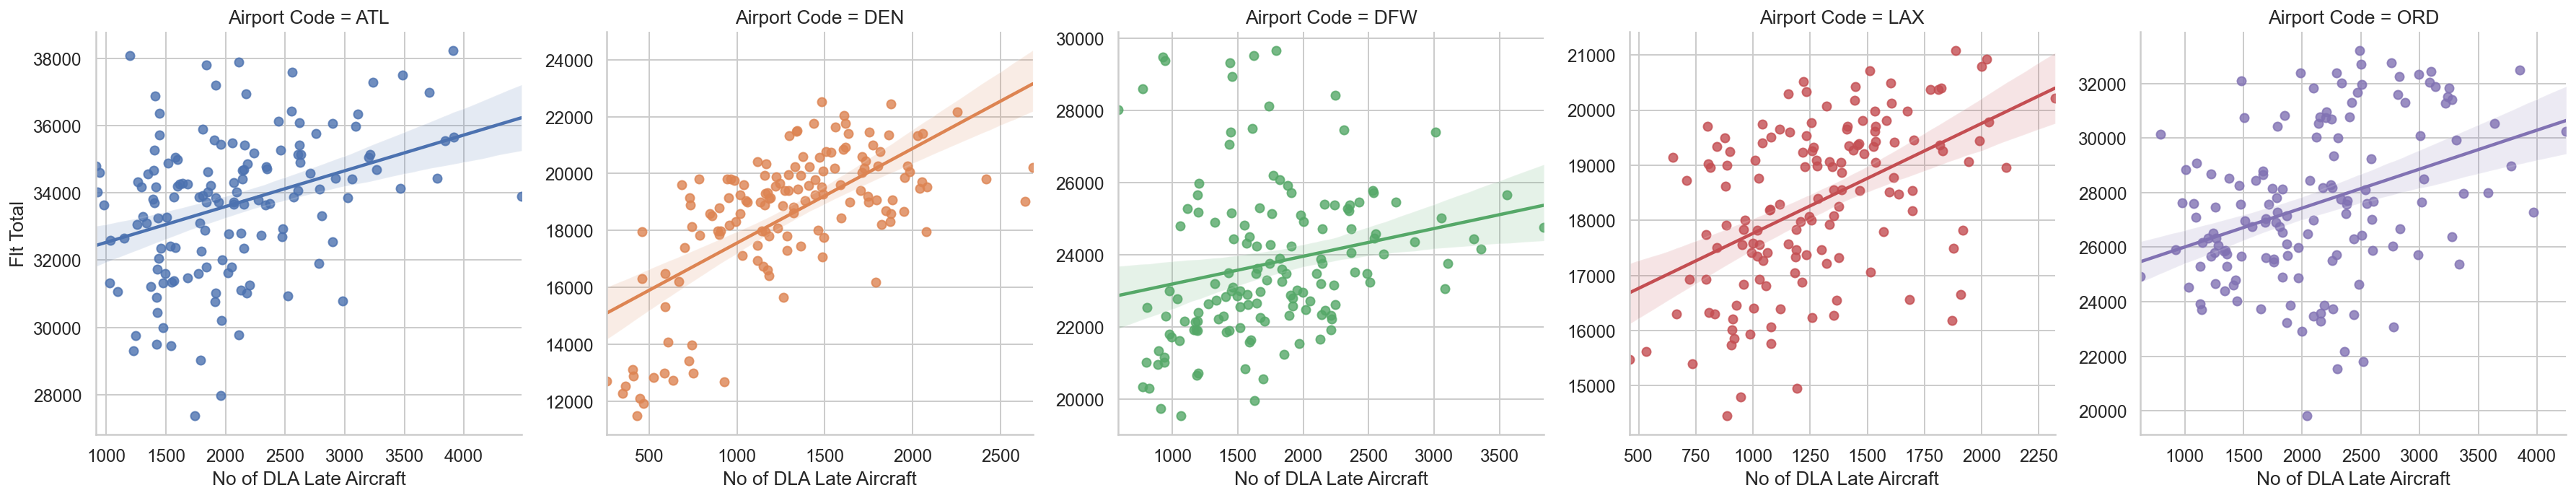

In [22]:
sns.lmplot(x="No of DLA Late Aircraft", y="Flt Total", col="Airport Code", hue="Airport Code",
           data=df, col_wrap=5, height=5, aspect=1.0, sharex=False, sharey=False);

### 4.3 NAS delays

<div class="alert alert-block alert-info"><b>National Aviation System (NAS):</b> Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
</div> 

In [23]:
df['No of DLA NAS'].describe()

count     720.000000
mean     1990.190278
std      1423.768515
min       289.000000
25%      1054.750000
50%      1503.000000
75%      2345.500000
max      8999.000000
Name: No of DLA NAS, dtype: float64

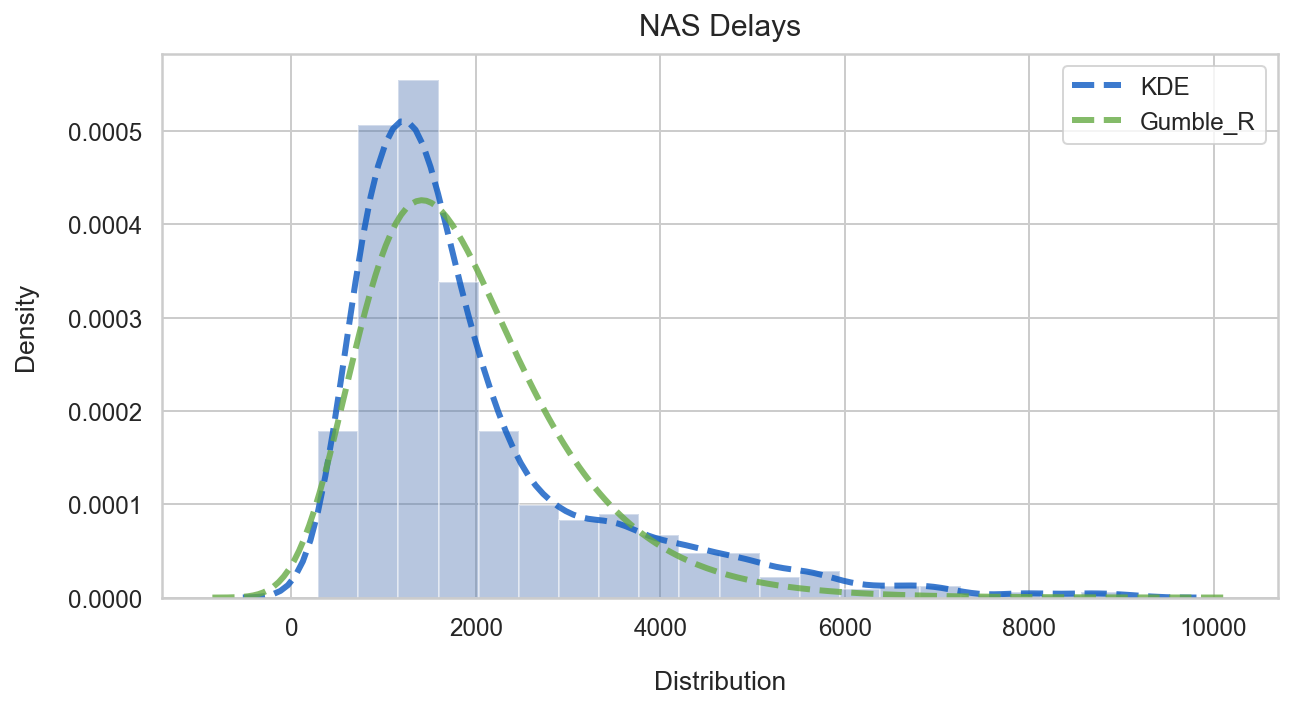

In [24]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(df['No of DLA NAS'], kde=True, bins=20, hist=True, fit=stats.gumbel_r, 
fit_kws={'color': '#66aa44','linewidth': 3, 'linestyle': '--', 'alpha': 0.8,"label": "Gumble_R"}, 
kde_kws={"label": "KDE",'color': '#0b59c2','linewidth': 3, 'linestyle': '--', 'alpha': 0.8})
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15)
plt.title("NAS Delays", fontsize=15, y=1.012)
plt.legend();

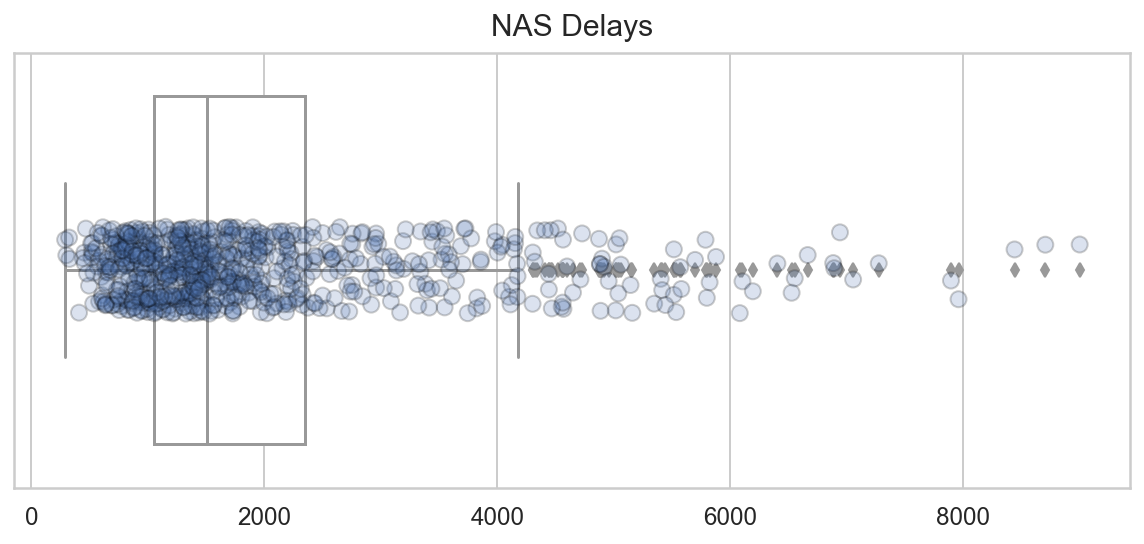

In [25]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 4]})
sns.boxplot(df['No of DLA NAS'], color="white")
sns.stripplot(df['No of DLA NAS'], edgecolor="black",
              alpha=.2, s=8, linewidth=1.0)
plt.xlabel('')
plt.title("NAS Delays", fontsize=15, y=1.012);

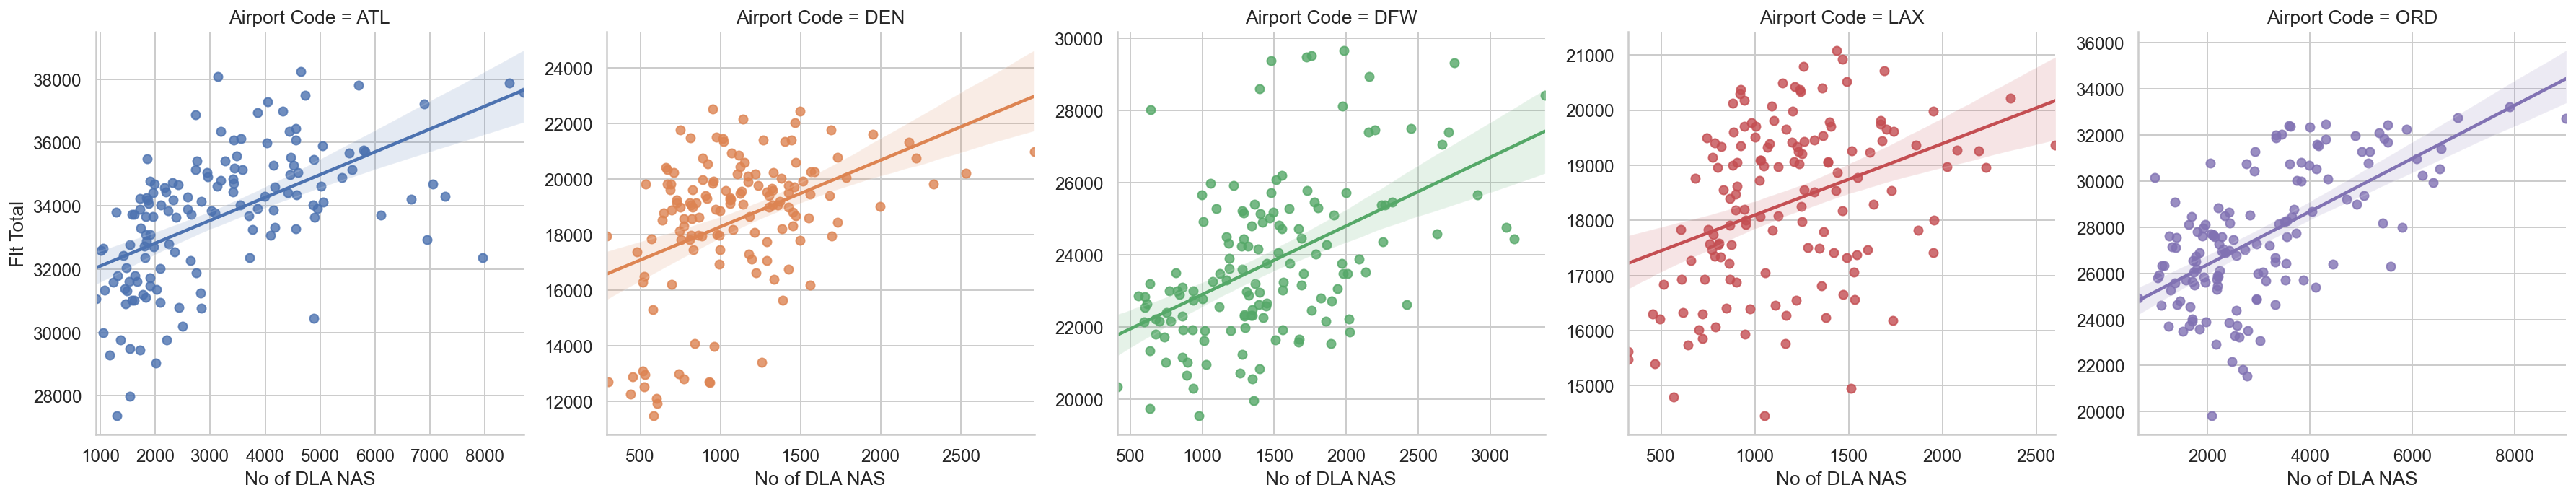

In [26]:
sns.lmplot(x="No of DLA NAS", y="Flt Total", col="Airport Code", hue="Airport Code",
           data=df, col_wrap=5, height=5, aspect=1.0, sharex=False, sharey=False);

### 4.4 Security delays

<div class="alert alert-block alert-info"><b>Security Delays:</b> Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
</div> 

In [27]:
df['No of DLA Security'].describe()

count    720.000000
mean       7.826389
std        7.053866
min        0.000000
25%        4.000000
50%        6.000000
75%       10.000000
max       94.000000
Name: No of DLA Security, dtype: float64

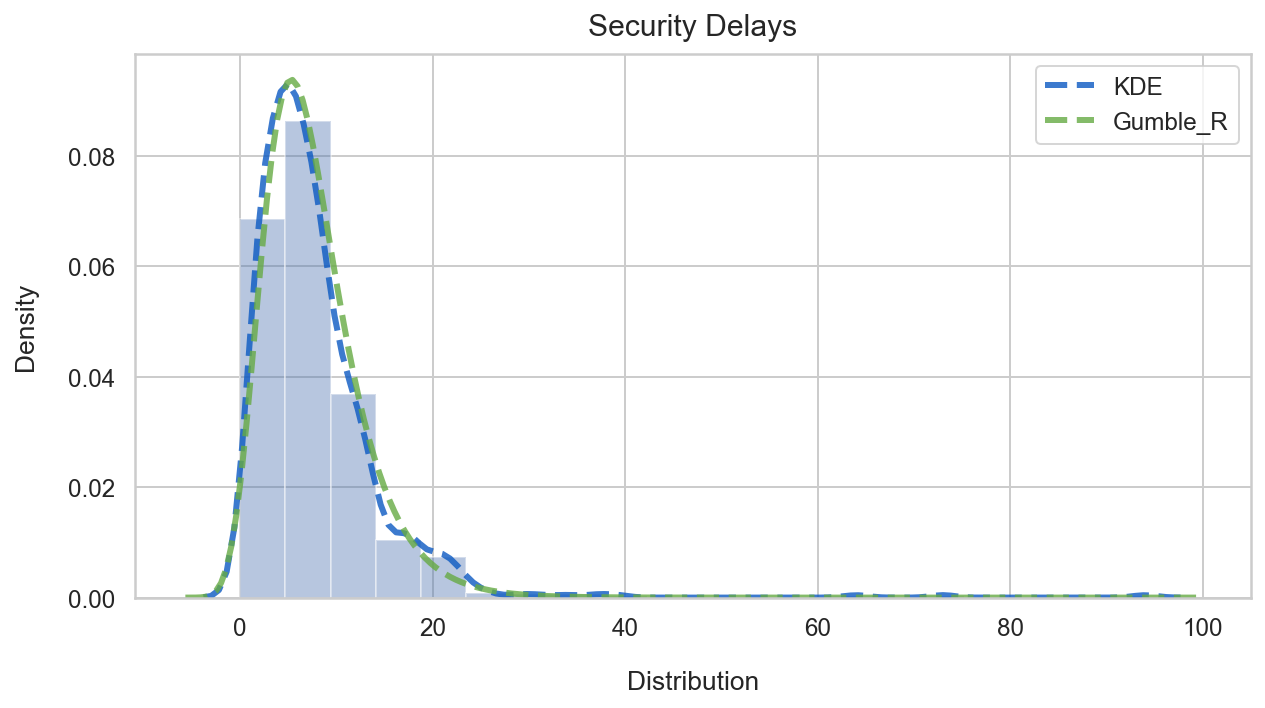

In [28]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(df['No of DLA Security'], kde=True, bins=20, hist=True, fit=stats.gumbel_r, 
fit_kws={'color': '#66aa44','linewidth': 3, 'linestyle': '--', 'alpha': 0.8,"label": "Gumble_R"}, 
kde_kws={"label": "KDE",'color': '#0b59c2','linewidth': 3, 'linestyle': '--', 'alpha': 0.8})
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15)
plt.title("Security Delays", fontsize=15, y=1.012)
plt.legend();

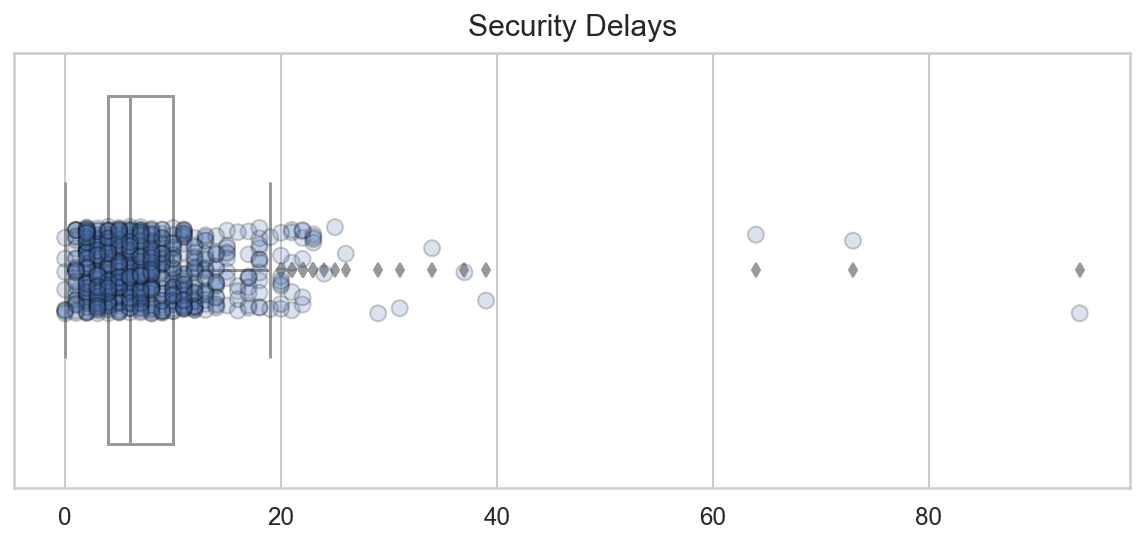

In [29]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 4]})
sns.boxplot(df['No of DLA Security'], color="white")
sns.stripplot(df['No of DLA Security'], edgecolor="black",
              alpha=.2, s=8, linewidth=1.0)
plt.xlabel('')
plt.title("Security Delays", fontsize=15, y=1.012);

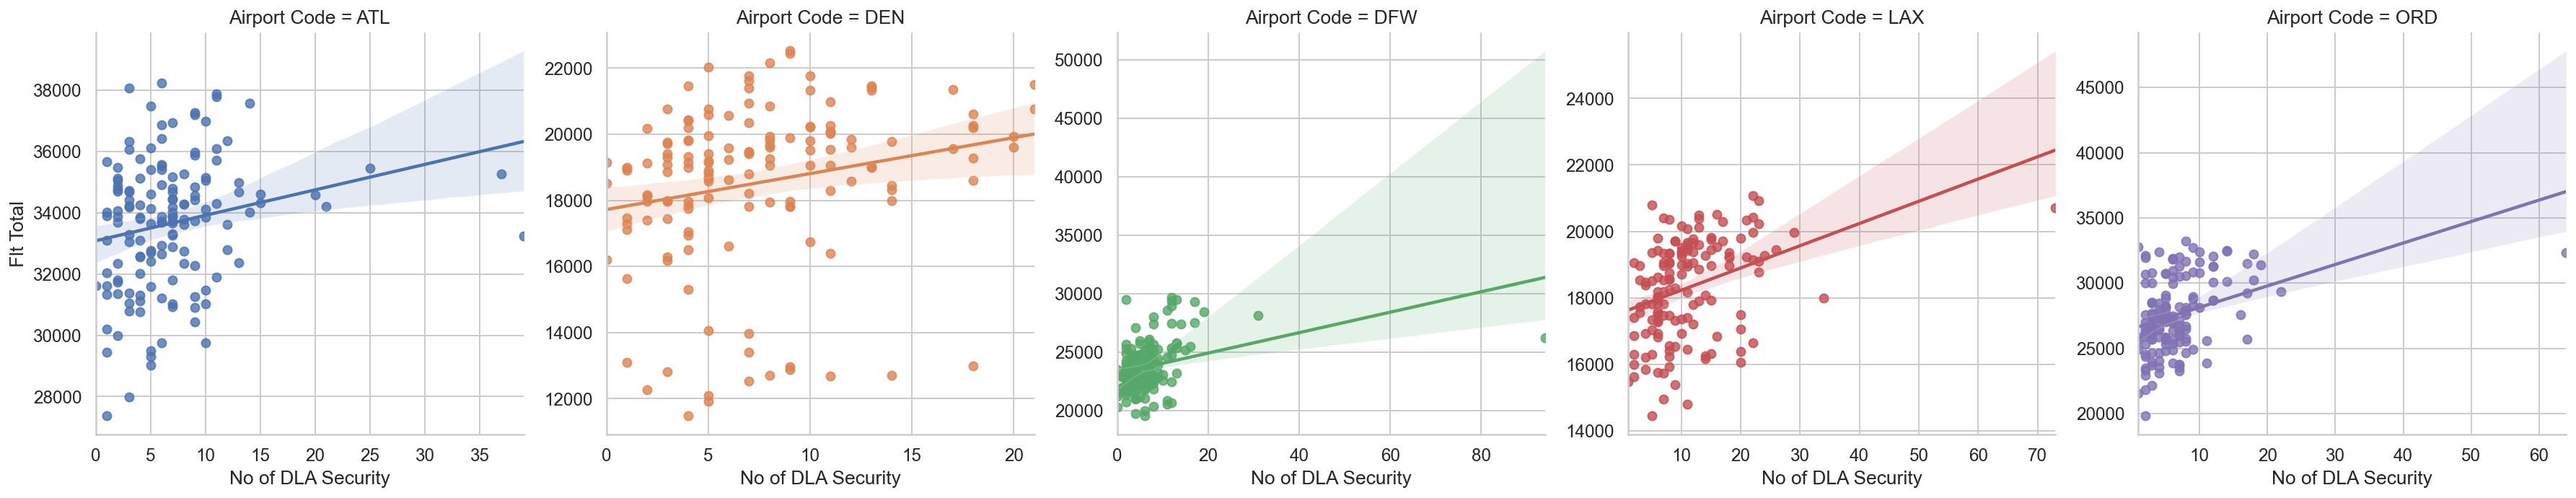

In [30]:
sns.lmplot(x="No of DLA Security", y="Flt Total", col="Airport Code", hue="Airport Code",
           data=df, col_wrap=5, height=5, aspect=1.0, sharex=False, sharey=False);

### 4.5 Weather delays

<div class="alert alert-block alert-info"><b>Weather Delays:</b> Extreme  weather  is  significant  meteorological  conditions  (actual  or  forecasted)  that,  in  the judgment of the carrier, delays or prevents the operation of a flight, such as a tornado, blizzard or hurricane.
</div> 

In [31]:
df['No of DLA Weather'].describe()

count    720.000000
mean     165.198611
std      123.545764
min       21.000000
25%       86.000000
50%      130.500000
75%      201.250000
max      812.000000
Name: No of DLA Weather, dtype: float64

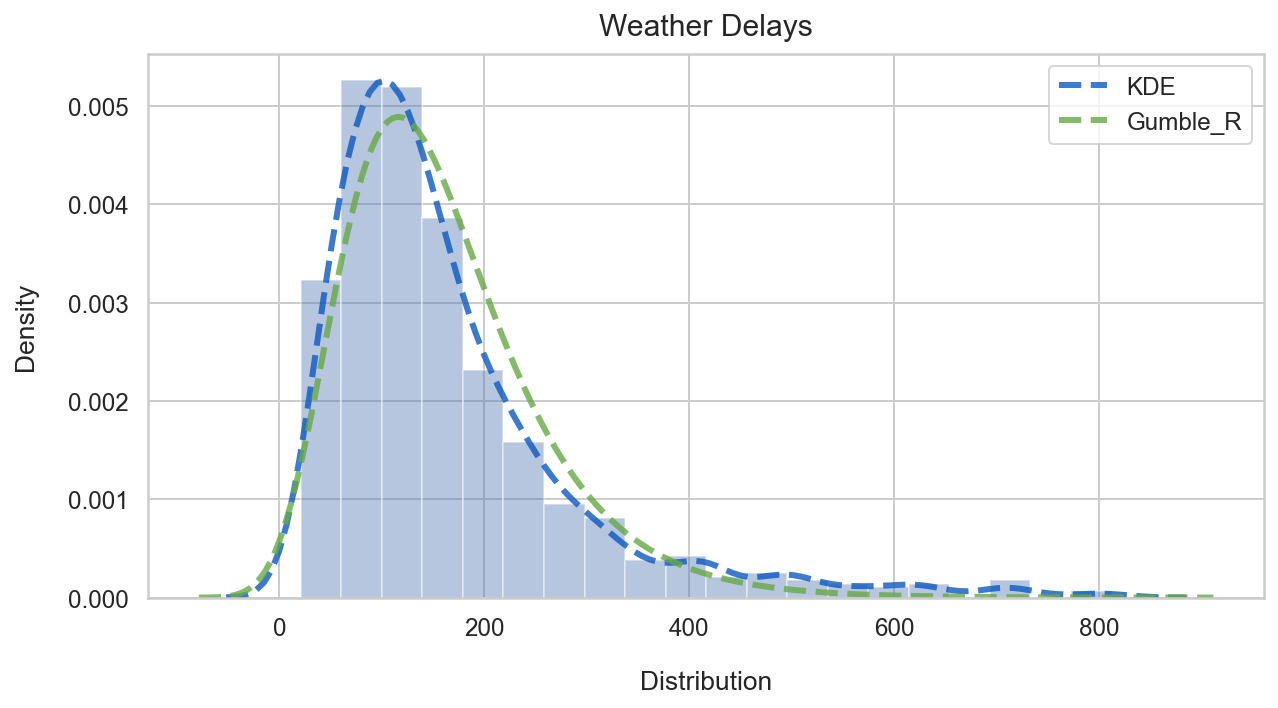

In [32]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(df['No of DLA Weather'], kde=True, bins=20, hist=True, fit=stats.gumbel_r, 
fit_kws={'color': '#66aa44','linewidth': 3, 'linestyle': '--', 'alpha': 0.8,"label": "Gumble_R"}, 
kde_kws={"label": "KDE",'color': '#0b59c2','linewidth': 3, 'linestyle': '--', 'alpha': 0.8})
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15)
plt.title("Weather Delays", fontsize=15, y=1.012)
plt.legend();

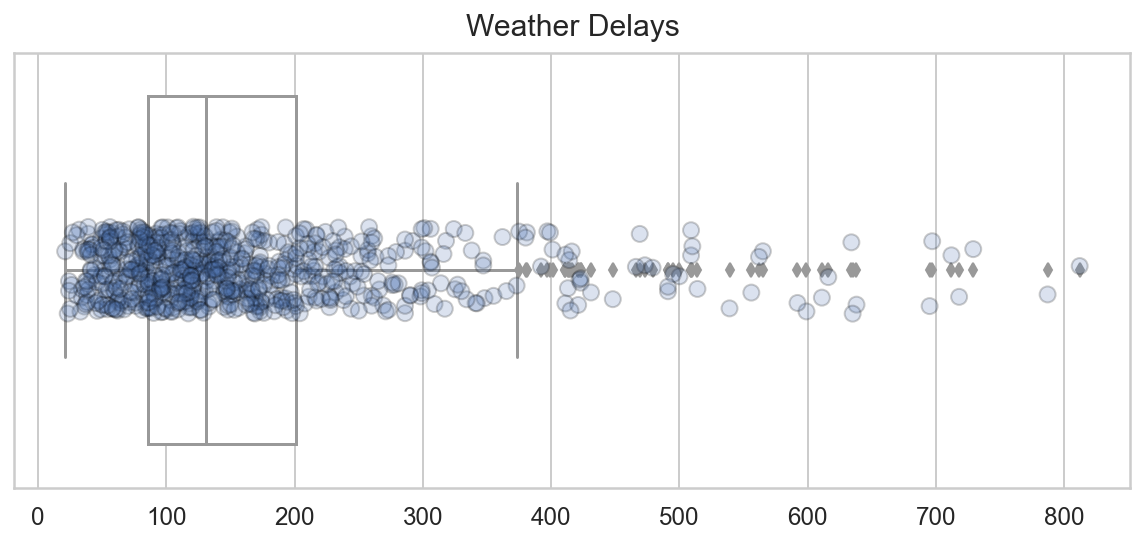

In [33]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 4]})
sns.boxplot(df['No of DLA Weather'], color="white")
sns.stripplot(df['No of DLA Weather'], edgecolor="black",
              alpha=.2, s=8, linewidth=1.0)
plt.xlabel('')
plt.title("Weather Delays", fontsize=15, y=1.012);

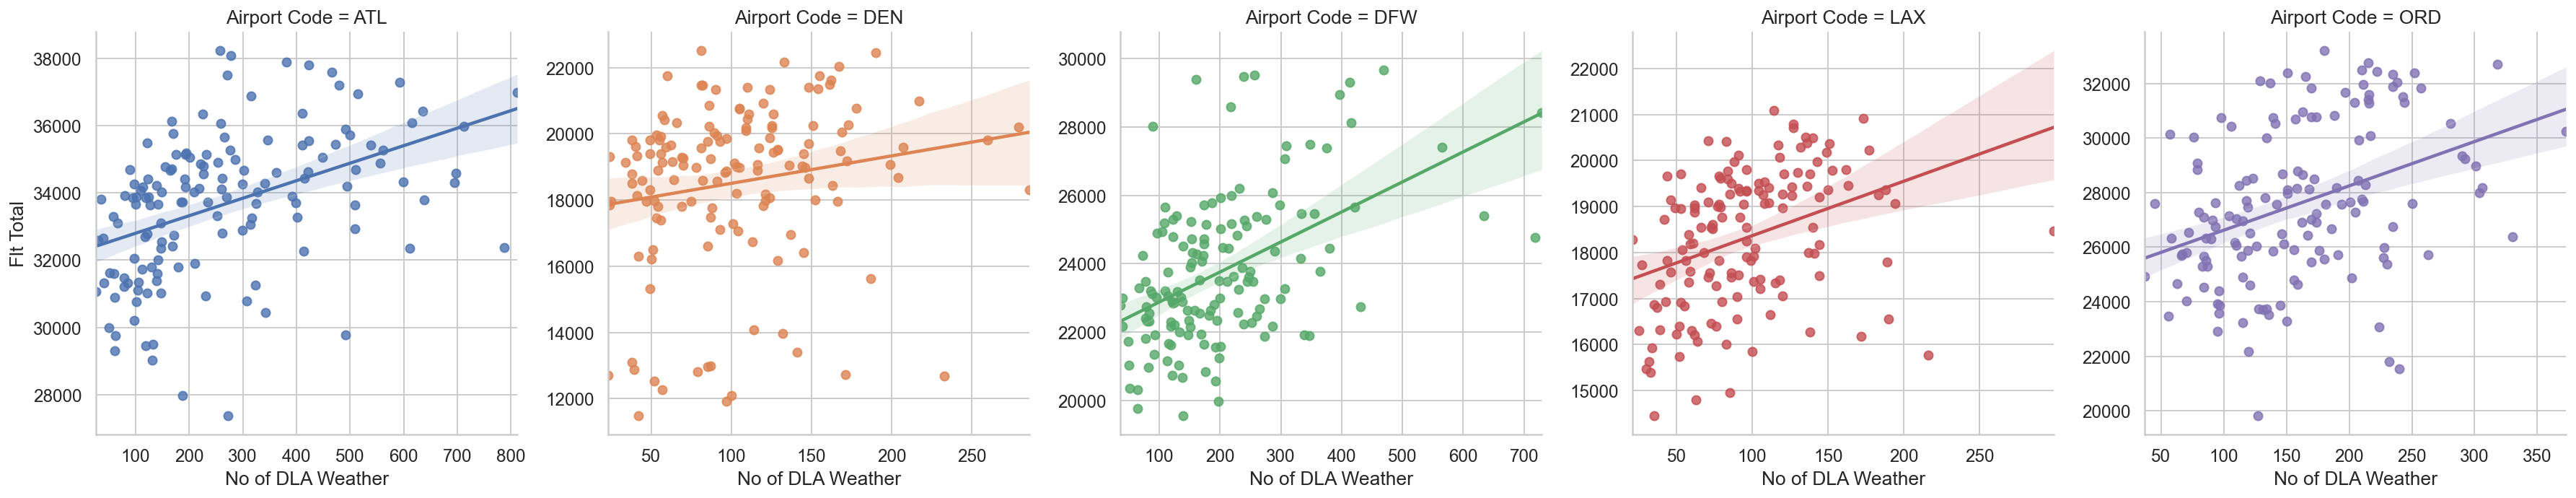

In [34]:
sns.lmplot(x="No of DLA Weather", y="Flt Total", col="Airport Code", hue="Airport Code",
           data=df, col_wrap=5, height=5, aspect=1.0, sharex=False, sharey=False);

## 5.0 Flight Status

### 5.1 Flights cancelled

In [192]:
df['Flt Cancelled'].describe()

count     720.000000
mean      509.584722
std       506.912464
min        29.000000
25%       193.000000
50%       341.500000
75%       635.000000
max      3680.000000
Name: Flt Cancelled, dtype: float64

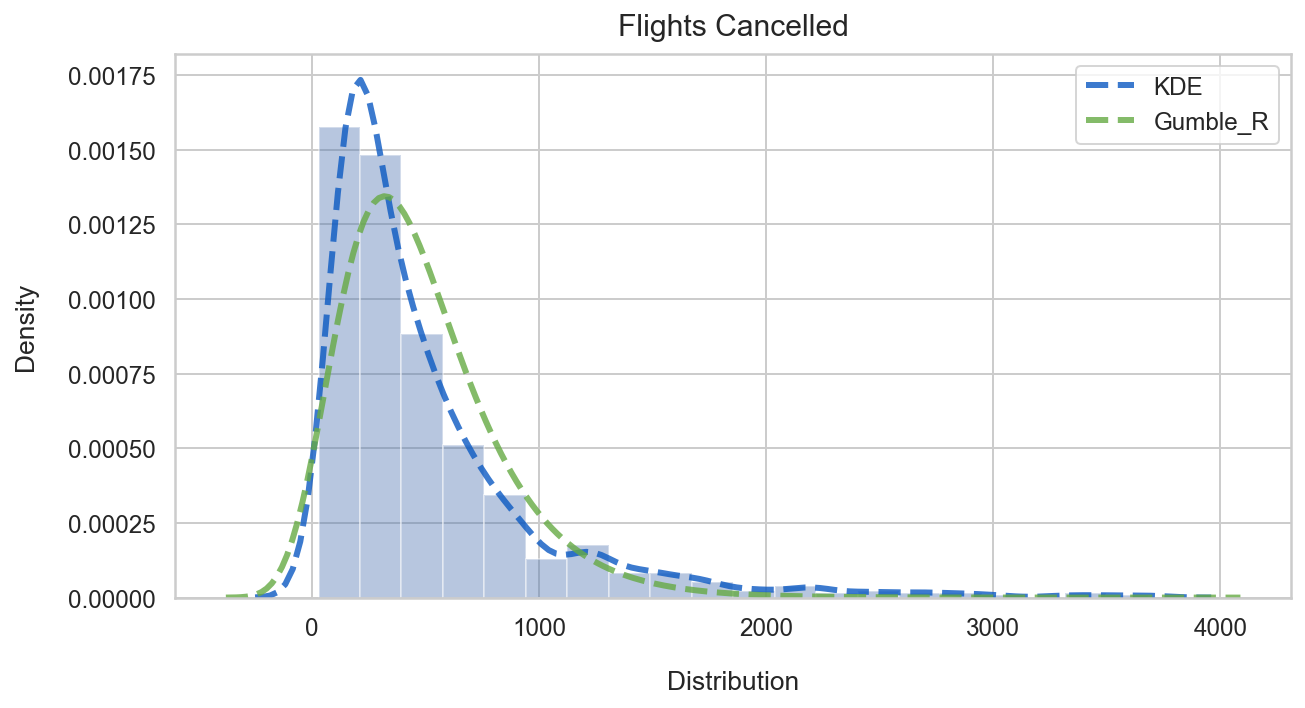

In [193]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(df['Flt Cancelled'], kde=True, bins=20, hist=True, fit=stats.gumbel_r, 
fit_kws={'color': '#66aa44','linewidth': 3, 'linestyle': '--', 'alpha': 0.8,"label": "Gumble_R"}, 
kde_kws={"label": "KDE",'color': '#0b59c2','linewidth': 3, 'linestyle': '--', 'alpha': 0.8})
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15)
plt.title("Flights Cancelled", fontsize=15, y=1.012)
plt.legend();

### 5.1 Flights diverted

In [194]:
df['Flt Diverted'].describe()

count    720.000000
mean      60.519444
std       60.429544
min        2.000000
25%       19.000000
50%       35.000000
75%       84.000000
max      442.000000
Name: Flt Diverted, dtype: float64

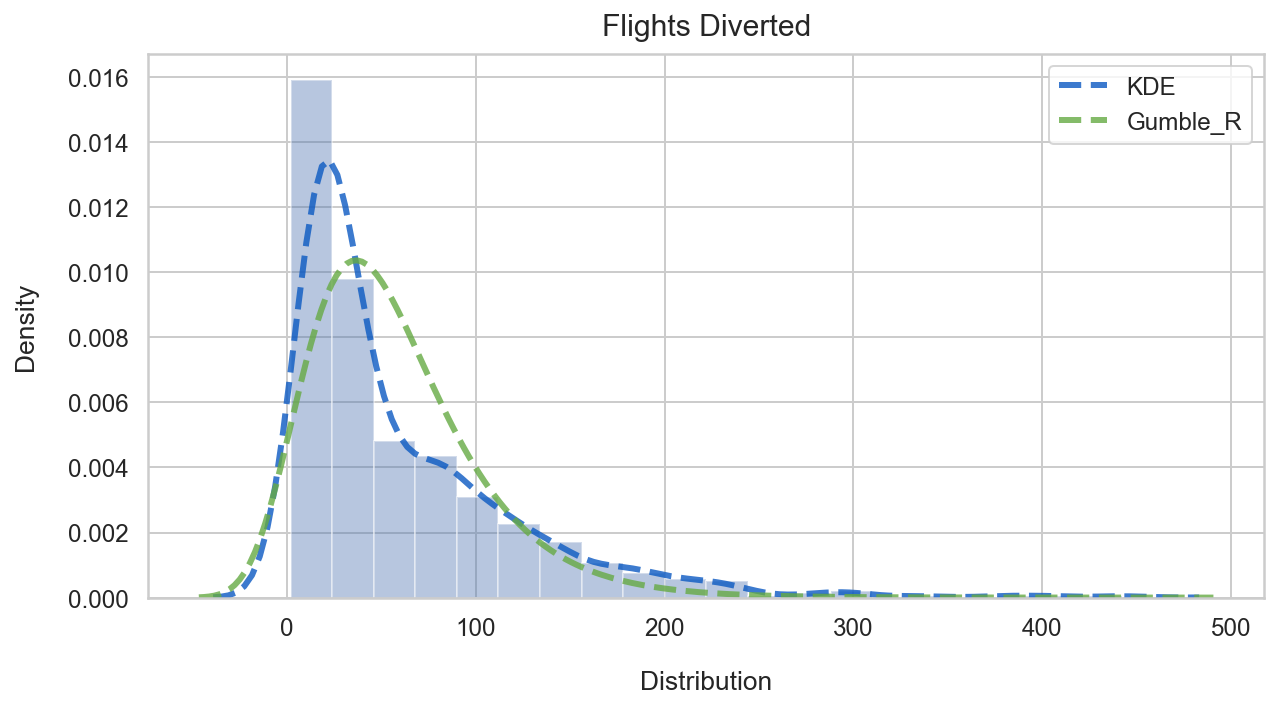

In [195]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(df['Flt Diverted'], kde=True, bins=20, hist=True, fit=stats.gumbel_r, 
fit_kws={'color': '#66aa44','linewidth': 3, 'linestyle': '--', 'alpha': 0.8,"label": "Gumble_R"}, 
kde_kws={"label": "KDE",'color': '#0b59c2','linewidth': 3, 'linestyle': '--', 'alpha': 0.8})
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Density", labelpad=15)
plt.title("Flights Diverted", fontsize=15, y=1.012)
plt.legend();

## 6.0 Simulation

In [170]:
rng = np.random.default_rng(1)
sim = pd.DataFrame({"No of DLA Carrier": rng.gumbel(961.0, 384.73, 720).round().astype(np.int),
                    "No of DLA Late Aircraft": rng.gumbel(1116.0, 696.91, 720).round().astype(np.int),
                    "No of DLA NAS": rng.gumbel(1514.0, 1423.76, 720).round().astype(np.int),
                    "No of DLA Security": rng.gumbel(7.0, 7.05, 720).round().astype(np.int),
                    "No of DLA Weather": rng.gumbel(86.0, 123.54, 720).round().astype(np.int),
                    "Flt Cancelled": rng.gumbel(154.0, 506.91, 720).round().astype(np.int),
                    "Flt Diverted": rng.gumbel(15.0, 60.42, 720).round().astype(np.int),
                    "Flt On Time": rng.gumbel(13116.0, 4730.00, 720).round().astype(np.int),
                    })

In [171]:
sim = sim.abs()

In [172]:
sim['Flt Delayed'] = sim['No of DLA Carrier']+sim['No of DLA Late Aircraft'] + \
    sim['No of DLA NAS']+sim['No of DLA Security']+sim['No of DLA Weather']

In [173]:
sim['Flt Total'] = sim['Flt Delayed']+sim['Flt Diverted'] + \
    sim['Flt Cancelled']+sim['Flt On Time']

In [174]:
df2 = df[["Airport Code", "City", "State", "Airport", "Time Label", "Time Month", "Time Month Name", "Time Year"]]

In [175]:
df2.reset_index();

In [176]:
df2.reset_index(drop=True);

In [177]:
df3=pd.concat([df2, sim.set_index(df2.index)], axis=1)

In [178]:
df3.reset_index();

In [179]:
df3.reset_index(drop=True);

In [180]:
df3 = df3[["Airport Code", "City", "State", "Airport", "Time Label", "Time Year",
          "Time Month Name", "Time Month", "No of DLA Carrier", "No of DLA Late Aircraft",
          "No of DLA NAS", "No of DLA Security", "No of DLA Weather", "Flt Cancelled",
          "Flt Delayed", "Flt Diverted", "Flt On Time", "Flt Total"
          ]]

In [181]:
df3.describe()

Time Year  Time Month  No of DLA Carrier  No of DLA Late Aircraft  \
count   720.000000  720.000000         720.000000               720.000000   
mean   2009.500000    6.500000        1177.662500              1496.981944   
std       3.454452    3.454452         469.009822               902.002489   
min    2004.000000    1.000000         216.000000                13.000000   
25%    2006.750000    3.750000         830.000000               875.750000   
50%    2009.500000    6.500000        1119.000000              1345.500000   
75%    2012.250000    9.250000        1422.000000              1977.500000   
max    2015.000000   12.000000        3341.000000              7563.000000   

       No of DLA NAS  No of DLA Security  No of DLA Weather  Flt Cancelled  \
count     720.000000          720.000000         720.000000     720.000000   
mean     2428.951389           11.752778         167.916667     575.941667   
std      1732.058979            8.834280         146.971537     540.586774   
min         5.000000            0.000000           0.000000       1.000000   
25%      1178.250000            5.000000          57.000000     196.750000   
50%      2081.000000           10.000000         127.000000     403.000000   
75%      3390.250000           16.000000         239.000000     798.250000   
max      9385.000000           58.000000        1060.000000    3117.000000   

        Flt Delayed  Flt Diverted   Flt On Time     Flt Total  
count    720.000000    720.000000    720.000000    720.000000  
mean    5283.265278     64.697222  15708.022222  21631.926389  
std     2027.494106     62.882034   6272.137966   6661.805147  
min      871.000000      0.000000   2806.000000   6973.000000  
25%     3830.250000     20.000000  11307.000000  16989.750000  
50%     5099.500000     46.500000  14634.000000  20666.000000  
75%     6486.500000     88.000000  18966.000000  25494.750000  
max    13246.000000    503.000000  54507.000000  62264.000000

In [182]:
df.describe()

Time Year  Time Month  No of DLA Carrier  No of DLA Late Aircraft  \
count   720.000000  720.000000         720.000000               720.000000   
mean   2009.500000    6.500000        1097.250000              1699.452778   
std       3.454452    3.454452         384.737125               696.912751   
min    2004.000000    1.000000         411.000000               261.000000   
25%    2006.750000    3.750000         824.000000              1199.250000   
50%    2009.500000    6.500000        1045.500000              1579.000000   
75%    2012.250000    9.250000        1277.250000              2095.500000   
max    2015.000000   12.000000        3087.000000              4483.000000   

       No of DLA NAS  No of DLA Security  No of DLA Weather  Flt Cancelled  \
count     720.000000          720.000000         720.000000     720.000000   
mean     1990.190278            7.826389         165.198611     509.584722   
std      1423.768515            7.053866         123.545764     506.912464   
min       289.000000            0.000000          21.000000      29.000000   
25%      1054.750000            4.000000          86.000000     193.000000   
50%      1503.000000            6.000000         130.500000     341.500000   
75%      2345.500000           10.000000         201.250000     635.000000   
max      8999.000000           94.000000         812.000000    3680.000000   

        Flt Delayed  Flt Diverted   Flt On Time     Flt Total  
count    720.000000    720.000000    720.000000    720.000000  
mean    4959.893056     60.519444  18845.276389  24375.273611  
std     2298.520210     60.429544   4730.004579   6224.769710  
min     1023.000000      2.000000   9218.000000  11480.000000  
25%     3305.500000     19.000000  15254.750000  19325.250000  
50%     4455.500000     35.000000  17719.500000  23097.000000  
75%     5903.000000     84.000000  21970.500000  29473.250000  
max    13699.000000    442.000000  31468.000000  38241.000000

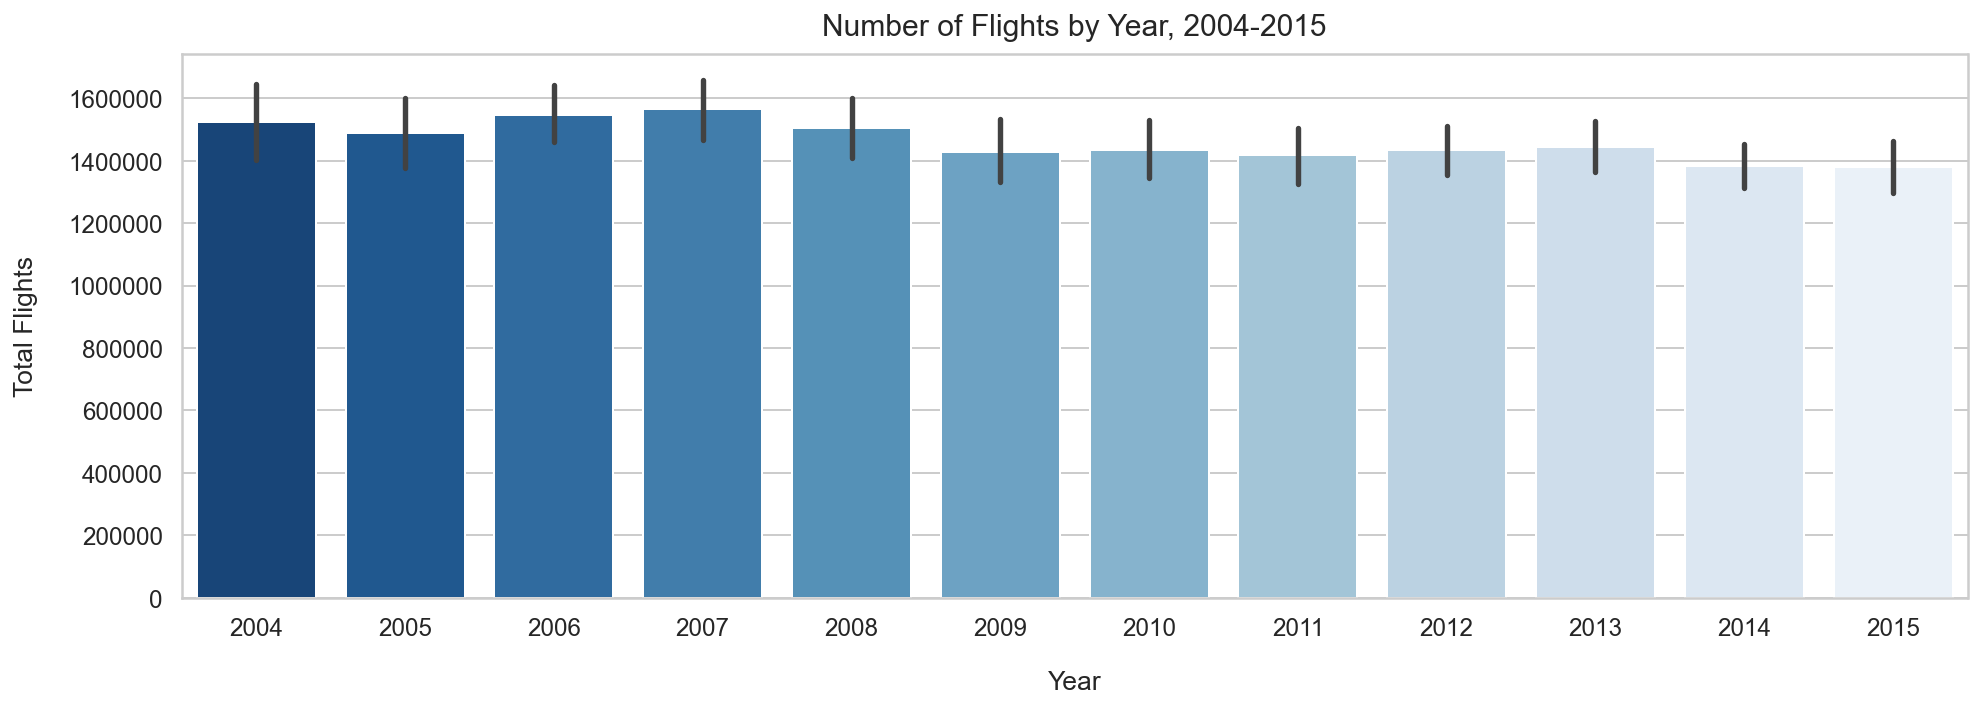

In [183]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [16, 5]})
sns.barplot(data=df, x='Time Year', y='Flt Total',
            palette="Blues_r", estimator=sum)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Flights", labelpad=15)
plt.title("Number of Flights by Year, 2004-2015", fontsize=15, y=1.012)
plt.ticklabel_format(style='plain', axis='y', useOffset=False);

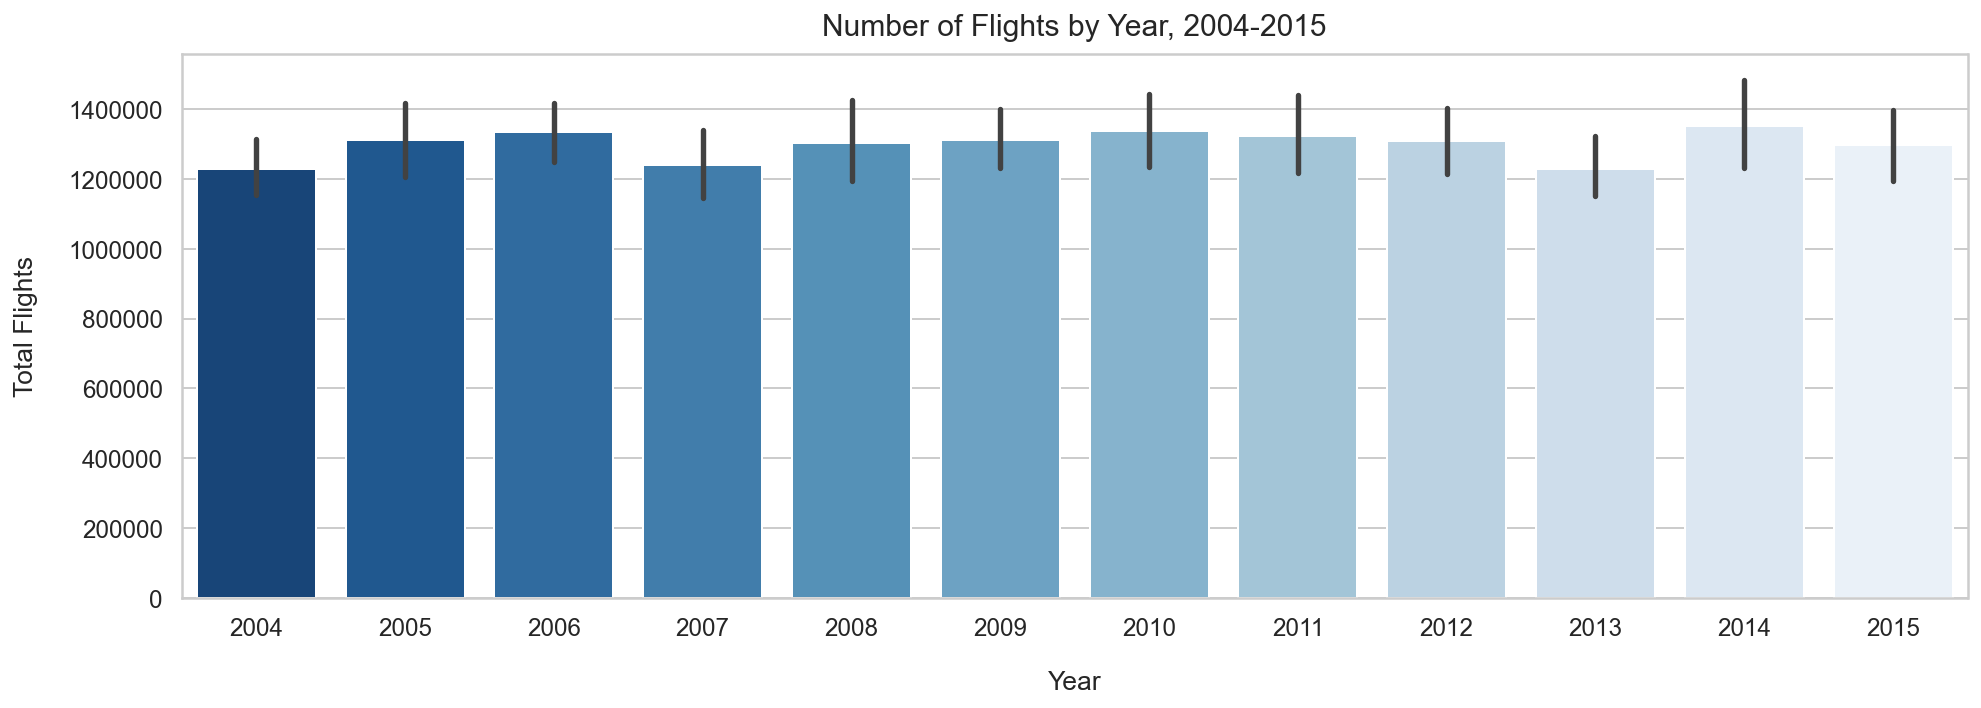

In [184]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [16, 5]})
sns.barplot(data=df3, x='Time Year', y='Flt Total',
            palette="Blues_r", estimator=sum)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Flights", labelpad=15)
plt.title("Number of Flights by Year, 2004-2015", fontsize=15, y=1.012)
plt.ticklabel_format(style='plain', axis='y', useOffset=False);

In [ ]:
df[delay_numeric].corr(method='pearson')
plt.figure(figsize=(8, 8))
corr = df[delay_numeric].corr(method='pearson')
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=5),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,

);

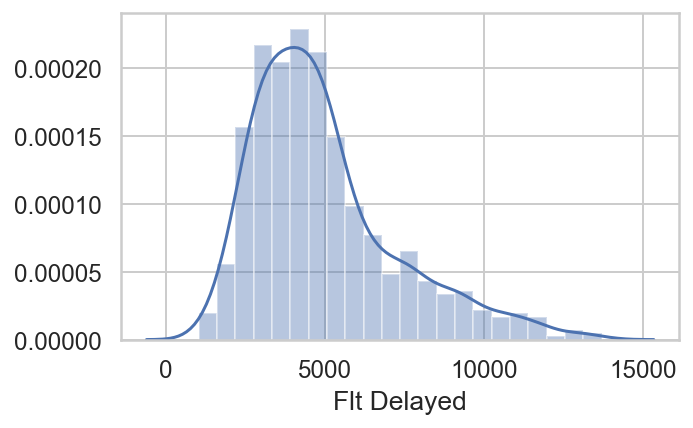

In [185]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [5, 3]})
sns.distplot(df['Flt Delayed'], kde=True);

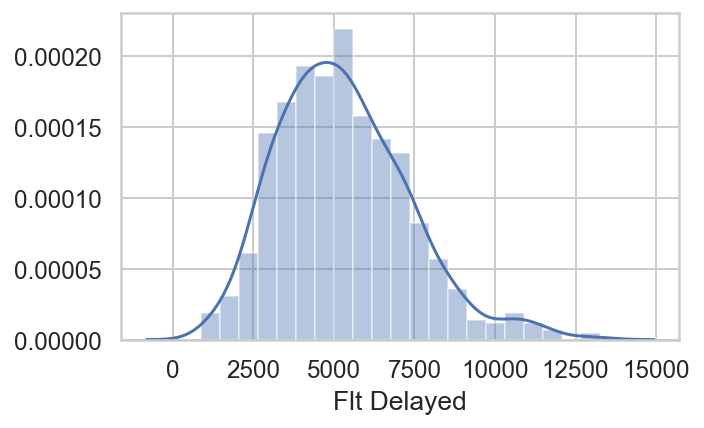

In [186]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [5, 3]})
sns.distplot(df3['Flt Delayed'], kde=True);

In [127]:
total_flights = df.groupby(["Time Year"])[["Flt Total"]].describe()
total_flights

Flt Total                                                         \
              count          mean          std      min       25%      50%   
Time Year                                                                    
2004           60.0  25419.166667  8184.370514  11918.0  19107.25  28635.0   
2005           60.0  24820.816667  7368.009212  11480.0  18951.00  25519.0   
2006           60.0  25770.083333  6037.025349  16751.0  19890.75  25193.0   
2007           60.0  26092.450000  6099.662195  17794.0  20218.50  24955.5   
2008           60.0  25058.816667  6278.722224  15392.0  19577.25  23486.0   
2009           60.0  23810.950000  6627.391144  14450.0  19023.25  22160.0   
2010           60.0  23899.616667  6295.778306  14800.0  19125.75  22514.0   
2011           60.0  23656.816667  5563.520866  14956.0  19345.25  22242.5   
2012           60.0  23893.066667  5273.536172  16924.0  19268.25  22938.0   
2013           60.0  24052.600000  5549.316593  16006.0  19060.00  23620.0   
2014           60.0  23025.616667  4720.786767  16179.0  19034.50  22972.5   
2015           60.0  23003.283333  5522.568372  15638.0  18055.50  21840.0   

                              
                75%      max  
Time Year                     
2004       32378.50  36361.0  
2005       28692.75  38076.0  
2006       31736.25  35419.0  
2007       32020.75  37284.0  
2008       30595.75  36434.0  
2009       26921.25  38241.0  
2010       27067.00  36128.0  
2011       27382.00  35052.0  
2012       27040.25  34915.0  
2013       27085.75  35541.0  
2014       25465.00  32702.0  
2015       27422.00  33735.0

In [128]:
total_flights = df3.groupby(["Time Year"])[["Flt Total"]].describe()
total_flights

Flt Total                                                         \
              count          mean          std      min       25%      50%   
Time Year                                                                    
2004           60.0  30789.783333  8391.184242  16029.0  24856.75  28343.0   
2005           60.0  28400.900000  6657.815229  18662.0  24138.75  26814.0   
2006           60.0  28257.966667  5600.735972  17786.0  23742.25  27799.0   
2007           60.0  28104.700000  4922.310217  17200.0  25098.50  28125.0   
2008           60.0  27468.433333  4975.587145  18291.0  23656.75  26560.0   
2009           60.0  29783.916667  7563.473042  17934.0  25297.25  28115.0   
2010           60.0  28958.600000  5970.425960  17433.0  25098.25  27722.0   
2011           60.0  27482.816667  4614.364086  18416.0  24286.00  26794.0   
2012           60.0  28814.600000  6360.930537  18555.0  25161.75  28207.5   
2013           60.0  28526.150000  6668.717171  17628.0  24697.25  27133.5   
2014           60.0  28741.316667  6654.798624  18065.0  24389.75  27099.0   
2015           60.0  28741.816667  6524.136344  19638.0  23341.25  27674.5   

                              
                75%      max  
Time Year                     
2004       34831.75  61172.0  
2005       31240.50  45600.0  
2006       31871.75  42325.0  
2007       30891.75  39220.0  
2008       31351.00  38016.0  
2009       32065.00  56845.0  
2010       31848.50  47707.0  
2011       30821.75  38177.0  
2012       34660.00  42290.0  
2013       30166.00  53612.0  
2014       32484.50  45575.0  
2015       32653.50  54117.0

In [ ]:
sns.distplot(df[delay_numeric], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},subplots=False)

In [ ]:
df[status_numeric].plot.kde(subplots=True,figsize=(15, 10), layout=(2, 3), sharex = False, sharey=False);

In [ ]:
sns.scatterplot(x=df['Flt Delayed'], y=df['Flt Total']);

In [ ]:
sns.scatterplot(x=synthetic['Flt Delayed'], y=df['Flt Total']);

In [ ]:

sns.lmplot(x='Flt Cancelled', y='Flt Total',hue="Airport Code", data=df);

In [ ]:
sns.scatterplot(x=df['Flt Delayed'], y=df['Flt On Time']);

In [ ]:
example3 = np.random.default_rng(7).normal(loc=1097, scale=384, size=720)
example3

In [ ]:
sns.scatterplot(x=df['Flt Diverted'], y=df['Flt On Time']);

In [ ]:
sns.lmplot(x='Flt Diverted', y='Flt On Time', data=df);

In [ ]:
# visualisation styling code
sns.set(rc={'figure.figsize': (9.5, 6.5)})
sns.set_context('notebook')
sns.set_style("whitegrid")

# plotting
sns.distplot(example3, kde=True, hist=True, kde_kws={
             "shade": True}, color='steelblue', rug=False)

In [ ]:
df.describe()

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[delay_types]);

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='No of DLA Carrier', data=df4, ax=subplot)

In [ ]:
df2.info()

In [ ]:
sns.set(rc={'figure.figsize': (9.5, 6.5)})
sns.set_context('notebook')
sns.set_style("whitegrid")
sns.scatterplot(x=df2['State'], y=df2['No of DLA Carrier']);
plt.xlabel("Distribution", labelpad=15)
plt.ylabel("Frequency", labelpad=15)
plt.title("Die Roll", fontsize=15, y=1.012);
plt.xticks(rotation=45);

In [ ]:
df.head()

In [ ]:
df.tail()

### Dataset info, null values etc.

### Dataset info, null values etc.

In [ ]:
df2['Minutes Delayed Carrier'] = pd.to_timedelta(df['Minutes Delayed Carrier'],unit='m')
df2['Minutes Delayed Late Aircraft'] = pd.to_timedelta(df['Minutes Delayed Late Aircraft'],unit='m')
df2['Minutes Delayed National Aviation System'] = pd.to_timedelta(df['Minutes Delayed National Aviation System'],unit='m')
df2['Minutes Delayed Security'] = pd.to_timedelta(df['Minutes Delayed Security'],unit='m')
df2['Minutes Delayed Total'] = pd.to_timedelta(df['Minutes Delayed Total'],unit='m')
df2['Minutes Delayed Weather'] = pd.to_timedelta(df['Minutes Delayed Weather'],unit='m')

### References

[1] Romani, E., 2020. *How To Generate Pseudo-Random Datasets In Python: Start From Scratch With Numpy & Faker*. [online] Medium. Available at: <https://towardsdatascience.com/how-to-generate-pseudo-random-datasets-in-python-start-from-scratch-with-numpy-faker-c5661e3bc58b> [Accessed 25 November 2020].

[2] The Alan Turing Institute. 2020. *Interpreting Large Datasets Using Simulation*. [online] Available at: <https://www.turing.ac.uk/research/research-projects/interpreting-large-datasets-using-simulation> [Accessed 25 November 2020].

[3] Zief0002.github.io. 2020. *Monte Carlo Simulation | Statistical Thinking: A Simulation Approach To Modeling Uncertainty*. [online] Available at: <https://zief0002.github.io/statistical-thinking/monte-carlo-simulation.html> [Accessed 25 November 2020].

[4] Obi Tayo, B., 2019. *Machine Learning Model For Stochastic Processes*. [online] Medium. Available at: <https://medium.com/towards-artificial-intelligence/machine-learning-model-for-stochastic-processes-c65a96f0b8c5> [Accessed 25 November 2020].

[5] Obi Tayo, B., 2019. *Building A Machine Learning Model When Data isn’t Available*. [online] Medium. Available at: <https://medium.com/towards-artificial-intelligence/building-a-machine-learning-model-when-data-isnt-available-fce8d20f0fd0> [Accessed 24 November 2020].

[6] appliedAI. 2020. *Synthetic Data Generation: Techniques, Best Practices & Tools*. [online] Available at: <https://research.aimultiple.com/synthetic-data-generation/> [Accessed 25 November 2020].

[7] GitHub. 2018. *Theodi/Synthetic-Data-Tutorial*. [online] Available at: <https://github.com/theodi/synthetic-data-tutorial> [Accessed 24 November 2020].

[8] Corgis-edu.github.io. 2020. *CORGIS Datasets Project*. [online] Available at: <https://corgis-edu.github.io/corgis/> [Accessed 1 December 2020].

[9] PhUSE. 2020. *An Introduction To Data Synthesis For Data Scientists*. [online] Available at: <https://www.phuse.eu/blog/an-introduction-to-data-synthesis-for-data-scientists> [Accessed 1 December 2020].

[10] Tausend, F., 2020. *Generate Your Sample Dataset — A Must Have Skill For Data Scientists*. [online] Medium. Available at: <https://towardsdatascience.com/generate-your-sample-dataset-a-must-have-skill-for-data-scientists-36ded8600b79> [Accessed 1 December 2020].

[11] Yildirim, S., 2020. *A Practical Guide For Exploratory Data Analysis: Flight Delays*. [online] Medium. Available at: <https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-flight-delays-f8a713ef7121> [Accessed 1 December 2020].

[12] BookIt Blog!. 2020. *Flight Delay Analysis: Flight Delays In The U.S*. [online] Available at: <https://blog.bookit.com/an-analysis-of-flight-delays-in-the-united-states/> [Accessed 1 December 2020].

[13] appliedAI. 2020. *The Ultimate Guide To Synthetic Data In 2020*. [online] Available at: <https://research.aimultiple.com/synthetic-data/> [Accessed 1 December 2020].

[14] Mueller, E. and Chatterji, G., 2002. *Analysis Of Aircraft Arrival And Departure Delay Characteristics*. [online] ResearchGate. Available at: <https://www.researchgate.net/publication/242389466_Analysis_of_Aircraft_Arrival_and_Departure_Delay_Characteristics> [Accessed 1 December 2020].

[15] The ClaimCompass Blog. 2020. *The Biggest And Busiest Airports In The US In 2020*. [online] Available at: <https://www.claimcompass.eu/blog/biggest-busiest-us-airports/> [Accessed 12 December 2020].